Data preprocessing for severity prognosis study in COVID-19

Autors: Maria Gabriela Valeriano, Ana Carolina Lorena, Carlos Kiffer

Source: Hospital Beneficência Portuguesa, made available by FAPESP through COVID-19 Data Sharing/BR-USP. The original data is available at https://repositoriodatasharingfapesp.uspdigital.usp.br/


In [1]:
library(tidyverse)
library(e1071)  
library(naniar)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
tests <-  read.csv("bp_integrated.csv", stringsAsFactors = FALSE)

In [3]:
tests %>% count(attendance_date)

attendance_date,n
<chr>,<int>
2017-04-17,3
2017-07-01,725
2017-07-03,817
2017-07-17,1522
2017-07-18,319
2017-09-12,337
2017-09-20,153
2017-11-01,217
2017-11-07,172


In [4]:
#number of tests
tests %>% dim

#number of ids
tests %>% select(id) %>% unique %>% dim

#number of id_attendance
tests %>% select(id_attendance) %>% unique %>% dim

[1] 5229119      25

[1] 33800     1

[1] 76506     1

In [5]:
#check outcome_patient for each attendance_type

tests %>% count(attendance_type)

tests %>% filter(attendance_type == "Atendimento Ambulatorial") %>% count(outcome_patient)

tests %>% filter(attendance_type == "Externo") %>% count(outcome_patient)

tests %>% filter(attendance_type == "Internado") %>% count(outcome_patient)

tests %>% filter(attendance_type == "Pronto socorro") %>% count(outcome_patient)

attendance_type,n
<chr>,<int>
Atendimento Ambulatorial,274614
Externo,629887
Internado,3756410
Pronto socorro,568208


outcome_patient,n
<chr>,<int>
Alta a pedido,36592
Alta Administrativa,236421
Alta ambulatorial/externo,398
Alta Cancelamento Atendimento,203
Alta do Pronto Atendimento,55
Alta Internacao BP,36
Alta melhorado,806
Transferencia Inter-Hospitalar,103


outcome_patient,n
<chr>,<int>
Alta a pedido,219
Alta Administrativa,628834
Alta ambulatorial/externo,206
Alta Cancelamento Atendimento,558
Alta melhorado,70


outcome_patient,n
<chr>,<int>
Alta a pedido,18328
Alta Administrativa,40191
Alta ambulatorial/externo,14765
Alta Cancelamento Atendimento,457
Alta curado,31926
Alta da Mae/Puerpera e do Recem- Nascido,193
Alta da Mae/Puerpera e Permanencia do Recem- Nascido,533
Alta do Pronto Atendimento,62
Alta Internacao BP,352


outcome_patient,n
<chr>,<int>
Alta a pedido,1577
Alta Administrativa,30005
Alta ambulatorial/externo,205
Alta Cancelamento Atendimento,38
Alta curado,581
Alta do Pronto Atendimento,323883
Alta Internacao,33640
Alta Internacao BP,171101
Alta melhorado,2634


In [6]:
#patients who confirmed covid by crp test up to 15 days after attendance

#check 'covid' in the column test
tests %>% 
filter (str_detect(test, "covid")) %>% 
count(test)

test,n
<chr>,<int>
coronavirus covid19,33965
coronavirus covid19 coalizao vi inativo,41
coronavirus covid19 pre cirurgico,6258


In [7]:
#filter 'covid' in test column
tests %>% 
filter (str_detect(test,"covid") & !str_detect(test,"inativo")) %>% 
count(test)

tests %>% 
filter (str_detect(test, "covid") & !str_detect(test, "inativo")) -> test_covid

test,n
<chr>,<int>
coronavirus covid19,33965
coronavirus covid19 pre cirurgico,6258


In [8]:
#check analyte for these tests, only the first is an analyte of interest 
test_covid %>% count(analyte)

#filter the analyte of interest
test_covid %>% filter (str_detect(analyte, "2019"))  %>% count(analyte)
test_covid %>% filter (str_detect(analyte, "2019"))  -> test_covid

analyte,n
<chr>,<int>
coronavirus 2019ncov,33960
covid 19 cultura,5
covid 19 deteccao por pcr,6258


analyte,n
<chr>,<int>
coronavirus 2019ncov,33960


In [9]:
#check which are the possible results
test_covid %>% count(result)

result,n
<chr>,<int>
DETECTADO,993
DETECTADO (POSITIVO),6140
DETECTAVEL,15
Inconclusivo,11
INCONCLUSIVO,34
Inconclusivo,8
INDETECTAVEL,198
NAO DETECTADO,2206
NAO DETECTADO (NEGATIVO),24355


In [10]:
#filter the positive cases
test_covid %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NAO")) %>% count(result)
test_covid %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NAO")) -> test_covid_positive

result,n
<chr>,<int>
DETECTADO,993
DETECTADO (POSITIVO),6140


In [11]:
#between the positive cases, filter only that comfirmet up to 15 days after attendance 
test_covid_positive %>% filter(test_days < 16) -> test_covid_positive

#check the filter
test_covid_positive %>% count(test_days)

test_days,n
<int>,<int>
0,6411
1,454
2,84
3,27
4,8
5,7
6,9
7,5
8,5


In [12]:
#select the id_attendance of patients who confirmed up to 15 days
test_covid_positive %>%
select(id_attendance) %>% unique -> id_positive

#number of id_attendance
id_positive %>% tally

#filter tests from these patients
tests %>% filter(id_attendance %in% id_positive$id_attendance) -> tests

#number of tests
tests %>% dim

n
<int>
7022


[1] 552294     25

In [13]:
#number of ids and attendances
tests %>% select(id) %>% unique %>% dim
tests %>% select(id_attendance) %>% unique %>% dim

[1] 6786    1

[1] 7022    1

In [14]:
#tests collect up to 4 days after attendance
tests %>% filter(test_days == "0" | test_days == "1" | test_days == "2" | test_days == "3" | test_days == "4") -> tests

#check the filter
tests %>% count(test_days)

test_days,n
<int>,<int>
0,91784
1,29838
2,27986
3,25790
4,24763


In [15]:
#number of id and id_attendance
tests %>% select(id_attendance) %>% unique() %>% dim
tests %>% select(id) %>% unique() %>% dim

#dimensions
tests %>% dim

[1] 7021    1

[1] 6786    1

[1] 200161     25

In [16]:
#some tests were realized more than once whithin the same id_attendance, keep just the first value 
tests %>% group_by(id_attendance,  test_analyte) %>% arrange((test_days)) %>% slice(1) %>% ungroup -> data

#dimensions
data %>% dim 

[1] 114718     25

In [17]:
#convert sex in numeric type
#as.character(data$sex) -> data$sex
data$sex[data$sex == "F"] <- 1
data$sex[data$sex == "M"] <- 0
as.numeric(data$sex) -> data$sex
data %>% count(sex)

#create the column age
data %>% mutate(age = (as.numeric(format(as.Date(data$attendance_date), '%Y')) -  
                as.numeric(data$birth_year))) -> data

data %>% count(age)

sex,n
<dbl>,<int>
0,60894
1,53824


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,n
<dbl>,<int>
0,1
1,3
2,88
3,2
4,2
5,2
6,27
7,4
8,113


In [18]:
data %>% select(age, id) %>% unique %>% count(age)

age,n
<dbl>,<int>
0,1
1,3
2,4
3,2
4,2
5,2
6,3
7,4
8,3


In [19]:
data %>% filter (age > 16) -> data

In [20]:
#number of id_attendance
data %>% select(id_attendance) %>% unique() %>% dim

#number of id
data %>% select(id) %>% unique() %>% dim

#dim
data %>% dim

[1] 1805    1

[1] 1751    1

[1] 30013    26

In [21]:
data %>% colnames

[1] "X"                "id"               "id_attendance"    "test_date"       
 [5] "place"            "result"           "measurement_unit" "normal_value"    
 [9] "test"             "analyte"          "test_analyte"     "sex"             
[13] "birth_year"       "country"          "state"            "city"            
[17] "zip_code"         "attendance_date"  "attendance_type"  "id_clinic"       
[21] "clinic"           "outcome_date"     "outcome_patient"  "outcome_days"    
[25] "test_days"        "age"

In [22]:
#filter patients hospitalized 
data %>% filter(attendance_type == 'Internado') -> data


In [23]:
data %>% select(-1) -> data
data %>% dim
data %>% select(id) %>% unique %>% dim
data %>% select(id_attendance) %>% unique %>% dim

[1] 13665    25

[1] 239   1

[1] 239   1

In [24]:
#check deaths
data %>% filter(str_detect(outcome_patient, 'Obito')) %>% count(outcome_patient)

#filter only deaths after 48h of hospitalization
data %>% filter(str_detect(outcome_patient, 'Obito')) %>% 
filter(!str_detect(outcome_patient, "Menor")) %>% count(outcome_patient)

data %>% filter(str_detect(outcome_patient, 'Obito')) %>% 
filter(!str_detect(outcome_patient, "Menor"))  -> data_deaths

outcome_patient,n
<chr>,<int>
Obito com declaracao fornecida pelo medico assistente Maior que 24 Horas de inte,2498
Obito com declaracao fornecida pelo medico assistente Menor que 24 Horas de inte,56
Obito com declaracao fornecida pelo- IML Maior que 24 Horas de internacao,41


outcome_patient,n
<chr>,<int>
Obito com declaracao fornecida pelo medico assistente Maior que 24 Horas de inte,2498
Obito com declaracao fornecida pelo- IML Maior que 24 Horas de internacao,41


In [25]:
#for patients that do not die
data %>% filter(!str_detect(outcome_patient, 'Obito')) %>% count(outcome_patient)
data %>% filter(!str_detect(outcome_patient, 'Obito')) -> data

#check outcome days
data %>% count(outcome_days)

#filter outcome_days > 1
data %>% filter(outcome_days > 1) -> data

#filter outcomes 
data %>% filter(outcome_patient == "Alta curado" | outcome_patient == 'Alta melhorado') %>% 
count(outcome_patient)

data %>% filter(outcome_patient == "Alta curado" | outcome_patient == 'Alta melhorado') -> data

#calculates the mean of hospitalization
data %>% select(id_attendance, outcome_days) %>% unique %>% select(outcome_days) -> test
test$outcome_days %>% mean

data %>% rbind(data_deaths) -> data

outcome_patient,n
<chr>,<int>
Alta a pedido,73
Alta Administrativa,253
Alta ambulatorial/externo,159
Alta curado,127
Alta melhorado,9914
Evadiu-se,82
Transferencia Inter-Hospitalar,425
Transferencia para outro estabelecimento,37


outcome_days,n
<int>,<int>
0,5
1,519
2,654
3,724
4,1051
5,672
6,886
7,588
8,637


outcome_patient,n
<chr>,<int>
Alta curado,127
Alta melhorado,9534


[1] 11.22561

In [26]:
data %>% dim

#number of ids
data %>% select(id_attendance) %>% unique %>% dim
data %>% select(id) %>% unique %>% dim

[1] 12200    25

[1] 195   1

[1] 195   1

In [27]:
data %>% count(outcome_patient)

outcome_patient,n
<chr>,<int>
Alta curado,127
Alta melhorado,9534
Obito com declaracao fornecida pelo medico assistente Maior que 24 Horas de inte,2498
Obito com declaracao fornecida pelo- IML Maior que 24 Horas de internacao,41


In [28]:
data %>% filter (outcome_days>14) %>% dim

[1] 2464   25

In [29]:
death_1 <- 0
death_2 <-
hospitalized <- 0

#create a new column 'severity'
data %>% mutate(severity = 0) -> data

for (i in (1:nrow(data))){ #run through the entire file 
  days <- data$outcome_days[i]
  outcome <- data$outcome_patient[i]

  #if the patient was hospitalized for more than 9 days
  if (!(is.na(days)) & days > 14){ 
   data$severity[i] <- 1
   hospitalized = hospitalized+1
   }
  
  #se death
  if (!(is.na(outcome)) &
      outcome == "Obito com declaracao fornecida pelo medico assistente Maior que 24 Horas de inte")
  {   data$severity[i] <- 1 
      death_1 = death_1+1}


    #se death
  if (!(is.na(outcome)) &
      outcome == "Obito com declaracao fornecida pelo- IML Maior que 24 Horas de internacao")
  {   data$severity[i] <- 1 
      death_2 = death_2+1}
}

data %>% count(severity)
death_1
death_2
hospitalized

severity,n
<dbl>,<int>
0,7197
1,5003


[1] 2498

[1] 41

[1] 2464

In [30]:
data %>% colnames %>% as.list

[[1]]
[1] "id"

[[2]]
[1] "id_attendance"

[[3]]
[1] "test_date"

[[4]]
[1] "place"

[[5]]
[1] "result"

[[6]]
[1] "measurement_unit"

[[7]]
[1] "normal_value"

[[8]]
[1] "test"

[[9]]
[1] "analyte"

[[10]]
[1] "test_analyte"

[[11]]
[1] "sex"

[[12]]
[1] "birth_year"

[[13]]
[1] "country"

[[14]]
[1] "state"

[[15]]
[1] "city"

[[16]]
[1] "zip_code"

[[17]]
[1] "attendance_date"

[[18]]
[1] "attendance_type"

[[19]]
[1] "id_clinic"

[[20]]
[1] "clinic"

[[21]]
[1] "outcome_date"

[[22]]
[1] "outcome_patient"

[[23]]
[1] "outcome_days"

[[24]]
[1] "test_days"

[[25]]
[1] "age"

[[26]]
[1] "severity"

In [31]:
#pivot turning each patient into a line 
data %>%   select(c(1,2,5,10,11,17,25,26)) %>% #select columns: id, id_attedance, test_analyte, result, age, sex, attendance_date and severity
  pivot_wider(names_from = test_analyte, values_from = result) %>%  #pivot turming test_analyte in several columns
  ungroup -> data


data %>% count(severity)
data %>% count(age)                
data %>% dim

severity,n
<dbl>,<int>
0,128
1,67


age,n
<dbl>,<int>
20,1
22,1
24,1
25,1
26,1
28,2
29,1
30,4
31,2


[1] 195 305

In [32]:
#filter 5


#remove patients who did not have blood count 
data = data[!is.na(data$'hemograma/neutrofilos'),  ]
#resultado
data %>% dim
data %>% count(severity)
data %>% select(id_attendance) %>% unique %>% dim
data %>% select(id) %>% unique %>% dim

[1] 189 305

severity,n
<dbl>,<int>
0,122
1,67


[1] 189   1

[1] 189   1

In [33]:
data %>% count(attendance_date)

attendance_date,n
<chr>,<int>
2020-03-14,1
2020-03-17,1
2020-03-20,1
2020-03-21,2
2020-03-22,2
2020-03-23,2
2020-03-24,1
2020-03-25,1
2020-03-26,3


In [34]:
#we do not have outcome information from the last patients, so we remove them
data %>% filter(data$attendance_date < as.Date('2021-01-17'))-> data
data %>% count(attendance_date)

#remove attedance_date
data %>% select(-c(attendance_date)) -> data

attendance_date,n
<chr>,<int>
2020-03-14,1
2020-03-17,1
2020-03-20,1
2020-03-21,2
2020-03-22,2
2020-03-23,2
2020-03-24,1
2020-03-25,1
2020-03-26,3


In [35]:
#turns some strings into numeric values 
data <- data %>% mutate_all(funs(str_replace(.,  "superior a", "")))
data <- data %>% mutate_all(funs(str_replace(.,  "inferior a", "")))
data <- data %>% mutate_all(funs(str_replace(.,  "1.000.000.", "1000000")))
data <- data %>% mutate_all(funs(str_replace(.,  "g/L", "")))
data <- data %>% mutate_all(funs(str_replace(.,  "negativa", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "Parcial Positivo", "1")))
data <- data %>% mutate_all(funs(str_replace(.,  "Parcial Nositivo", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "POSITIVO", "1")))
data <- data %>% mutate_all(funs(str_replace(.,  "NEGATIVO", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "NÃO REAGENTE", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "REAGENTE", "1")))
data <- data %>% mutate_all(funs(str_replace(.,  "não reagente", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "REAGENTE. maior ou igual a 1000", "1000")))
data <- data %>% mutate_all(funs(str_replace(.,  "Parcial Negativo", "0")))   
                            
data <- data %>% replace_with_na_all(condition = ~.x == "Indeterminado")   

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


In [36]:
#check data colnames
data %>% colnames

[1] "id"                                                                                                                    
  [2] "id_attendance"                                                                                                         
  [3] "sex"                                                                                                                   
  [4] "age"                                                                                                                   
  [5] "severity"                                                                                                              
  [6] "acido lactico lactato sangue total arterial/lactato sangue"                                                            
  [7] "acido urico plasma/acido urico soro"                                                                                   
  [8] "bilirrubinas total direta e indireta plasma/bilirrubina direta"                                                        
  [9] "bilirrubinas total direta e indireta plasma/bilirrubina indireta"                                                      
 [10] "bilirrubinas total direta e indireta plasma/bilirrubina total"                                                         
 [11] "calcio ionico/calcio ionizado sangue"                                                                                  
 [12] "calcio plasma/calcio"                                                                                                  
 [13] "colesterol total soro/colesterol total"                                                                                
 [14] "coronavirus covid19/coronavirus 2019ncov"                                                                              
 [15] "creatinina plasma/creatinina"                                                                                          
 [16] "creatino fosfoquinase cpk plasma/ck"                                                                                   
 [17] "creatino fosfoquinase fracao mb ckmb massa plasma/ckmb eletroquimioluminescencia"                                      
 [18] "cultura/cultura"                                                                                                       
 [19] "desidrogenase latica dhl plasma/dhl"                                                                                   
 [20] "dimero d plasma/dimeros d quantitativo"                                                                                
 [21] "fator antinucleo fan anticorpos totais soro/fan aparelho mitotico"                                                     
 [22] "fator antinucleo fan anticorpos totais soro/fan citoplasmatico"                                                        
 [23] "fator antinucleo fan anticorpos totais soro/fan nuclear"                                                               
 [24] "fator antinucleo fan anticorpos totais soro/fan nucleolar"                                                             
 [25] "fator antinucleo fan anticorpos totais soro/fan placa cromossomica metafasica"                                         
 [26] "fator reumatoide anticorpos soro/fator reumatoide"                                                                     
 [27] "ferritina soro/ferritina"                                                                                              
 [28] "fosfatase alcalina plasma/fosfatase alcalina"                                                                          
 [29] "gasometria arterial/be arterial"                                                                                       
 [30] "gasometria arterial/ctco2 arterial"                                                                                    
 [31] "gasometria arterial/cto2 arterial"                                                                                     
 [32] "gasometria arterial/fhhb arterial"                        

In [37]:
#convert all columns in numeric
data <- as.data.frame(lapply(data, as.numeric))

Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.num

In [38]:
#functions to remove extrem values

#turn in NA extreme values on the right (mean > median)
extremes_r <- function(x) {

  #turn each x in column tibble  
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 4)) %>% select(1) %>% as.list -> values
  values[[1]] ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x
  
} 

#turn in NA extreme values on the left (median > mean)
extremes_l <- function(x) {

  #turn each x in column tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the left
  x %>% count(value) %>% slice(1:4) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

  
}

#turn in NA extreme values on the left (median > mean)
extremes_rl <- function(x) {

  #turn each x in column tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 2 extreme values on the right 
  x %>% count(value) %>% slice(1:2) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #sets the 2 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 2)) %>% select(1) %>% as.list -> values2
  c(values2[[1]]) ->> values2

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values2) -> x
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

}

remove_extremes <- function(x) {
    x %>% as.tibble -> x  
    names(x) <- ('value')
    
    if (nrow(count(x,value)) > 20) {
        
        x[[1]] -> x 
        skewness <- x %>% skewness(na.rm = TRUE)
       # median <- x %>% median(na.rm = TRUE)
      #  amplitude <- abs(max(x, na.rm = TRUE) - min(x, na.rm = TRUE))


        if (abs(skewness) <= (0.5)){
            x %>% extremes_rl -> x
        } else {

            if (skewness > 0){
                x %>% extremes_r -> x
            } else {
                x %>% extremes_l -> x
            }
        }
    }
    
    return(x)
}  

In [39]:
#remove the extrem values
n <- names(data) %>% `names<-`(c(.))
data %>% map(~ remove_extremes(.)) %>% as.data.frame -> data
names(data) <-n

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


In [40]:
#tests with a maximum of 50% missing values per class 

#filter only the severe patients
data %>% filter(severity == 1) -> severe

#filter tests with a maximum of 50% missing values
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(severe[,i]))
  if (temp >= (nrow(severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

#filter only the severe patients
data %>% filter(severity == 0) -> n_severe

#filter tests with a maximum of 50% missing values  
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(n_severe[,i]))
  if (temp >= (nrow(n_severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

[1] 67

[1] 45

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


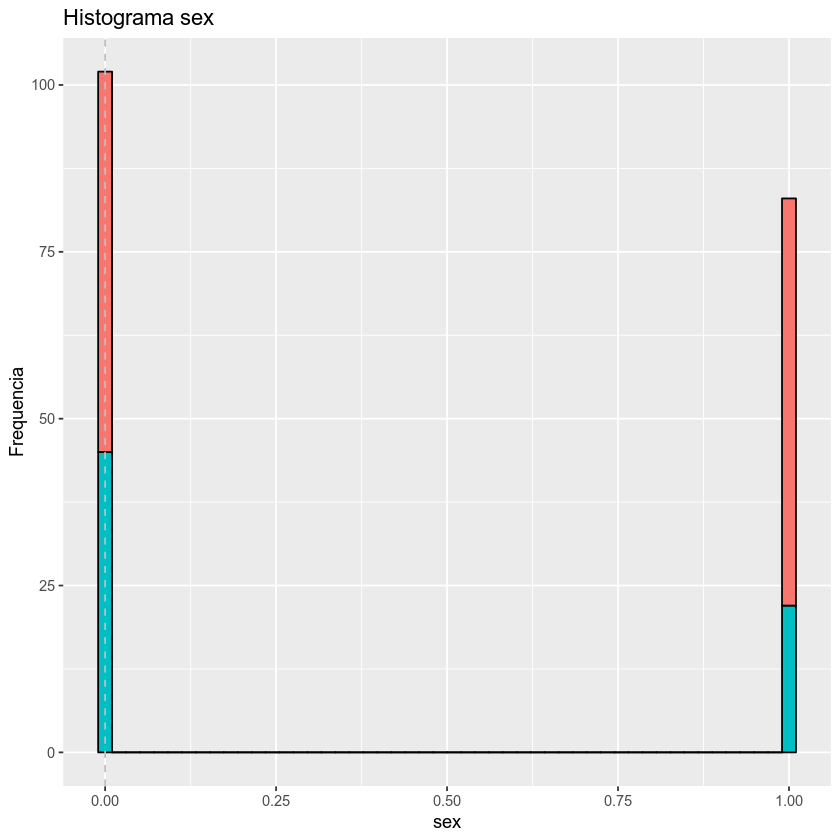

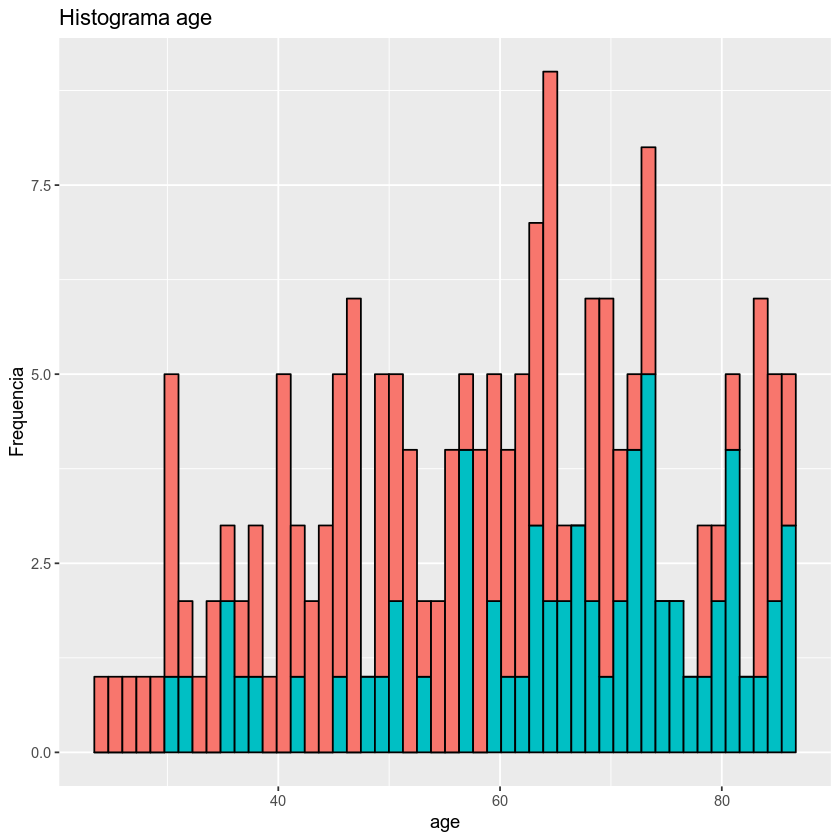

Warning message:
“Removed 74 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


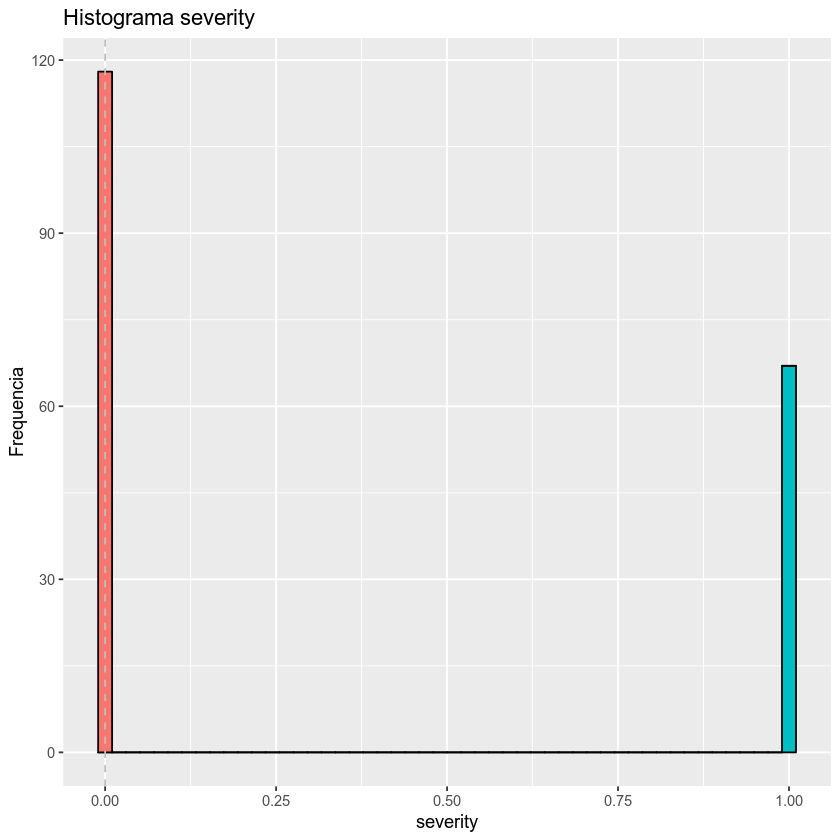

Warning message:
“Removed 74 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


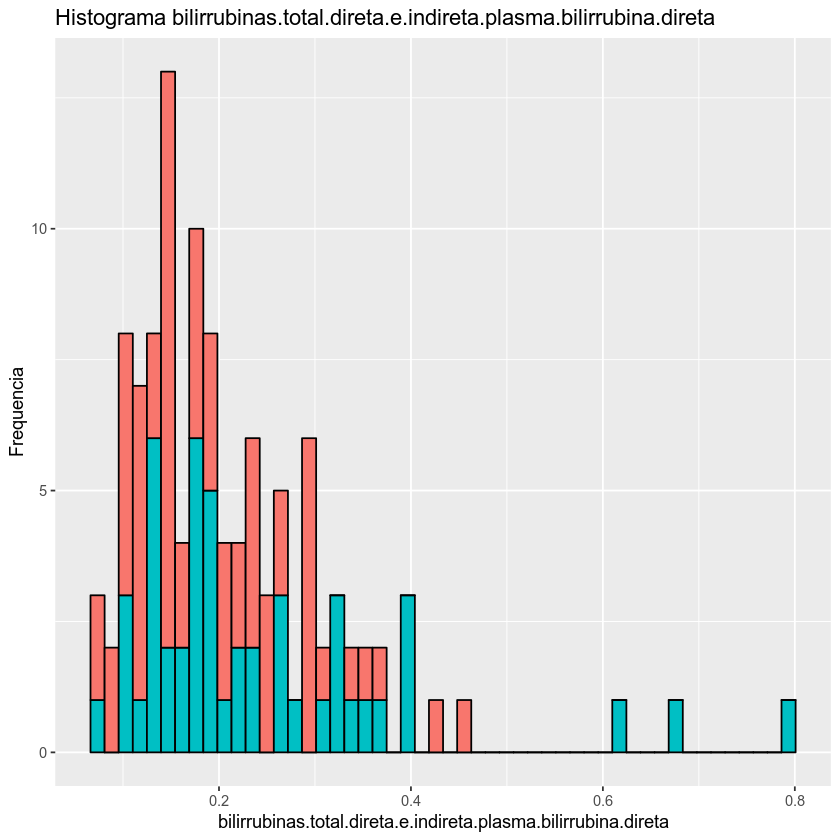

Warning message:
“Removed 74 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


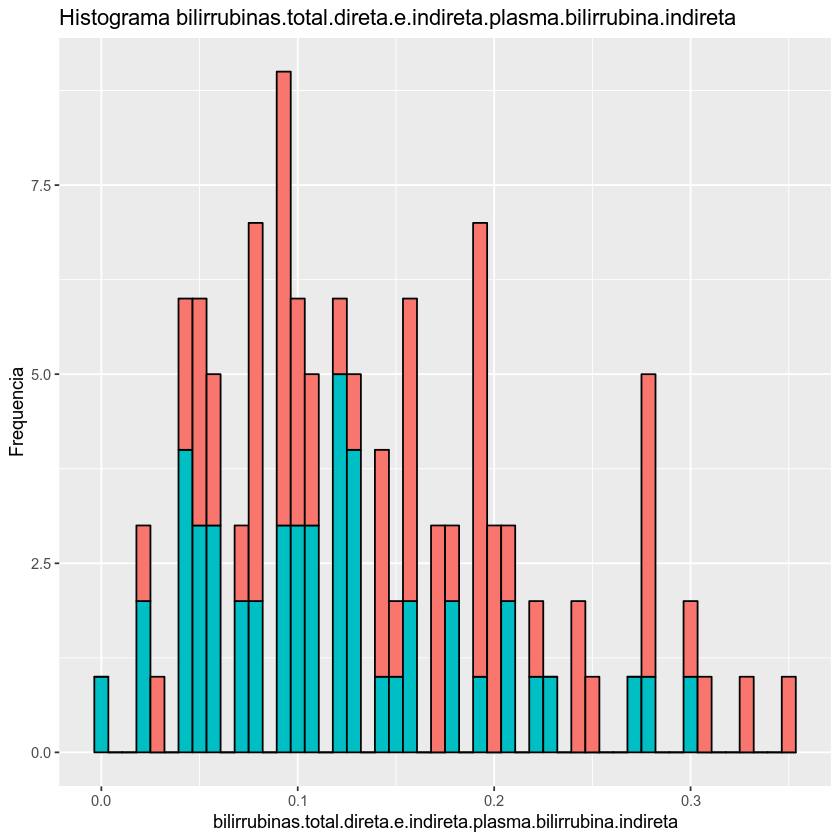

Warning message:
“Removed 54 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


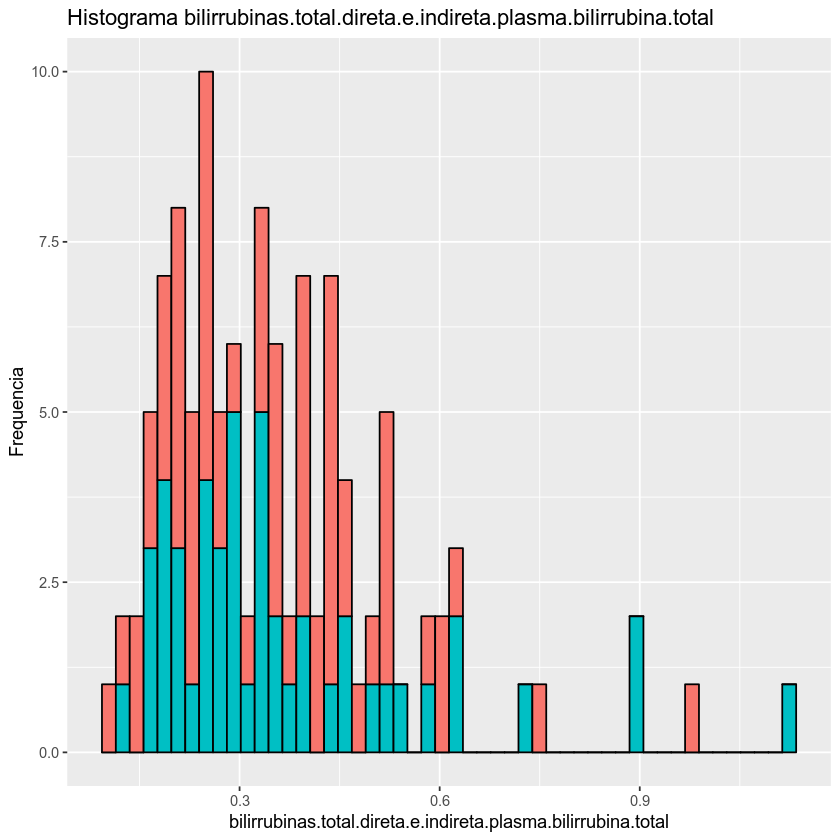

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


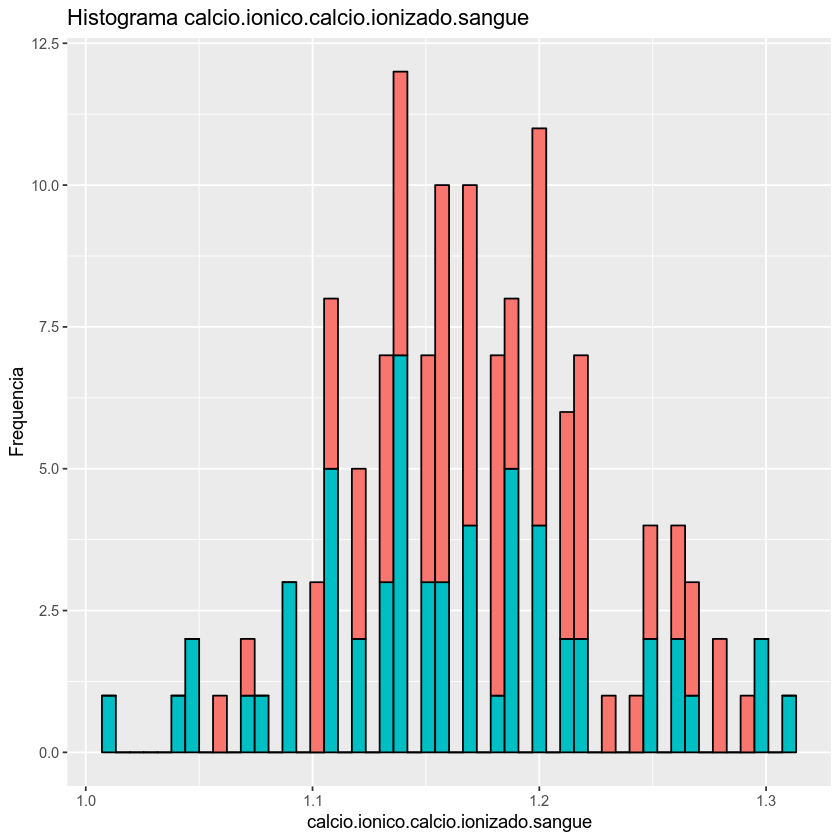

Warning message:
“Removed 58 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


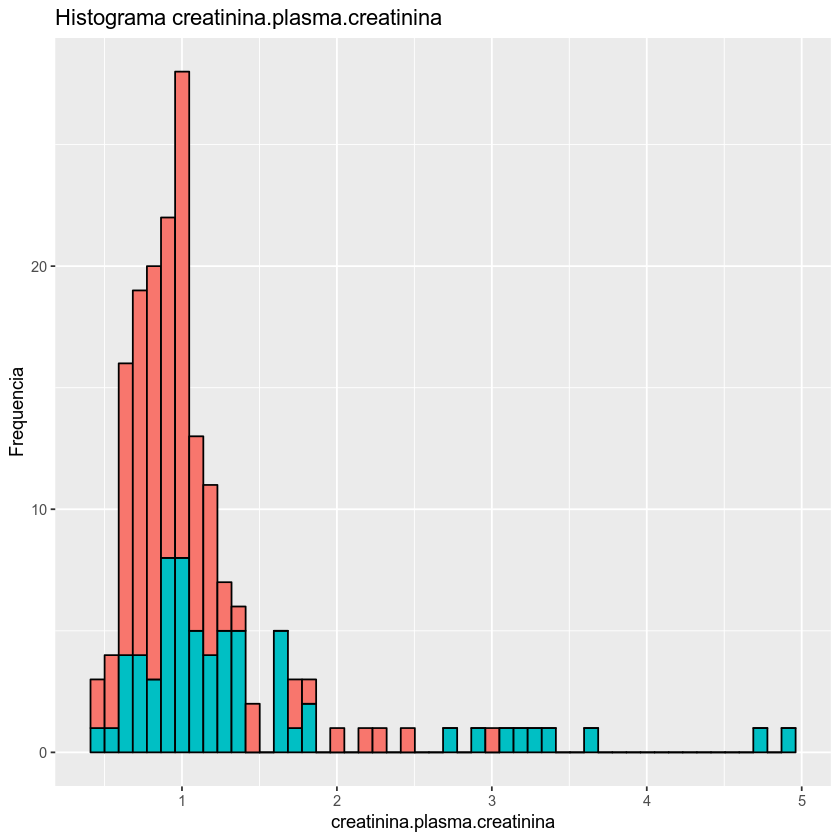

Warning message:
“Removed 57 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


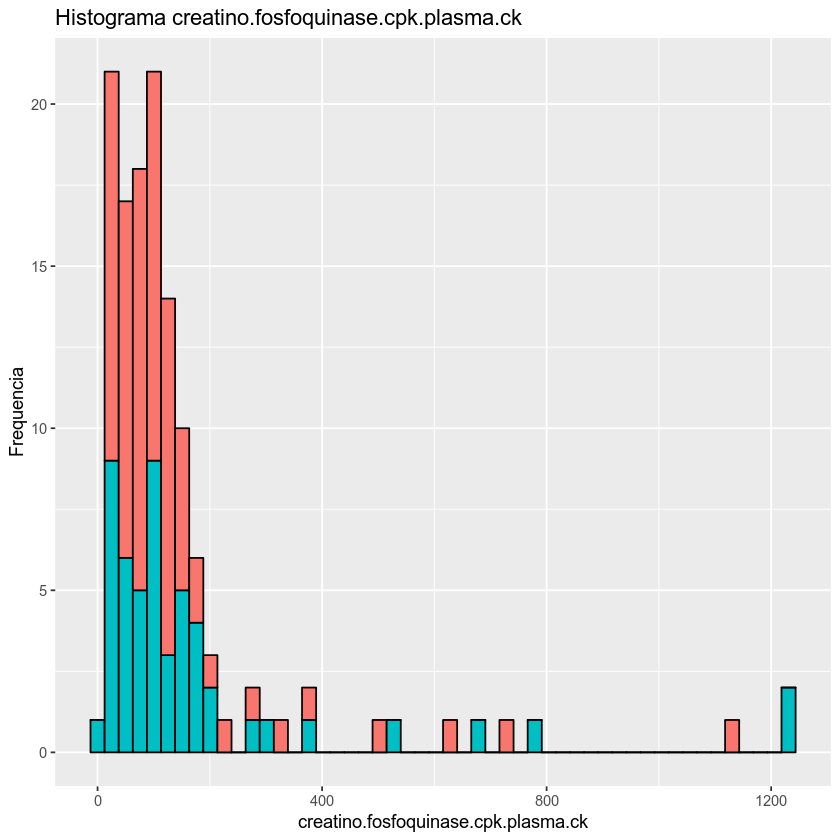

Warning message:
“Removed 64 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


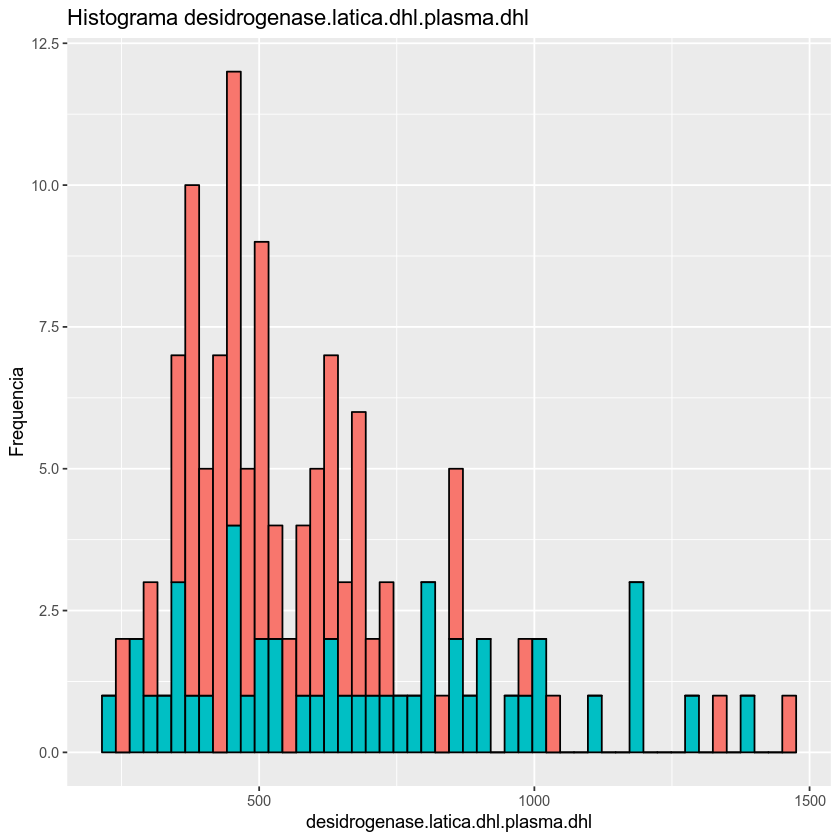

Warning message:
“Removed 71 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


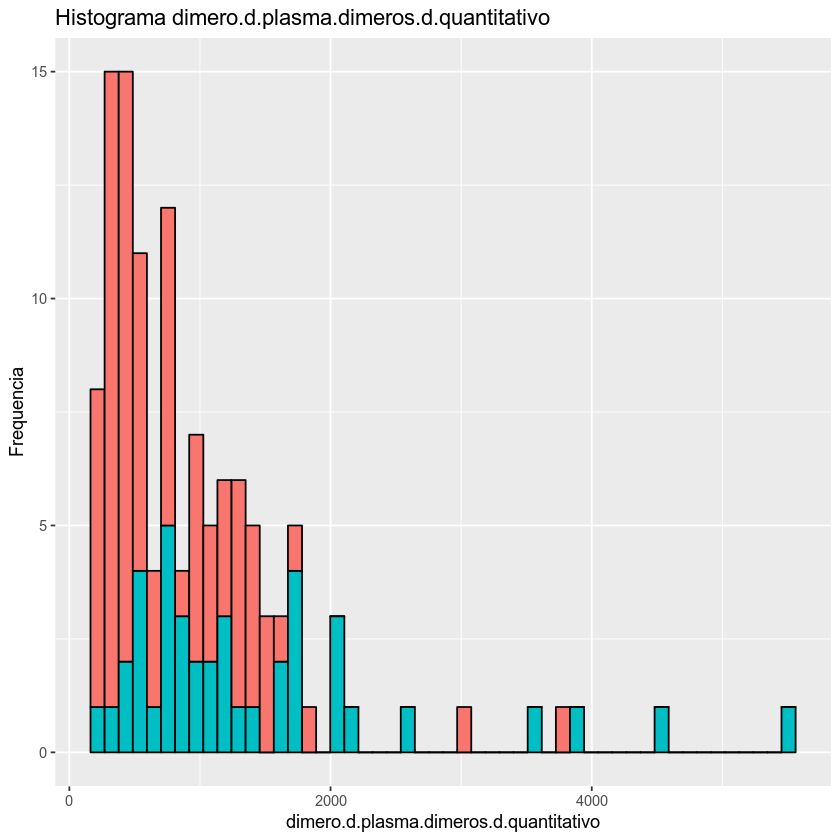

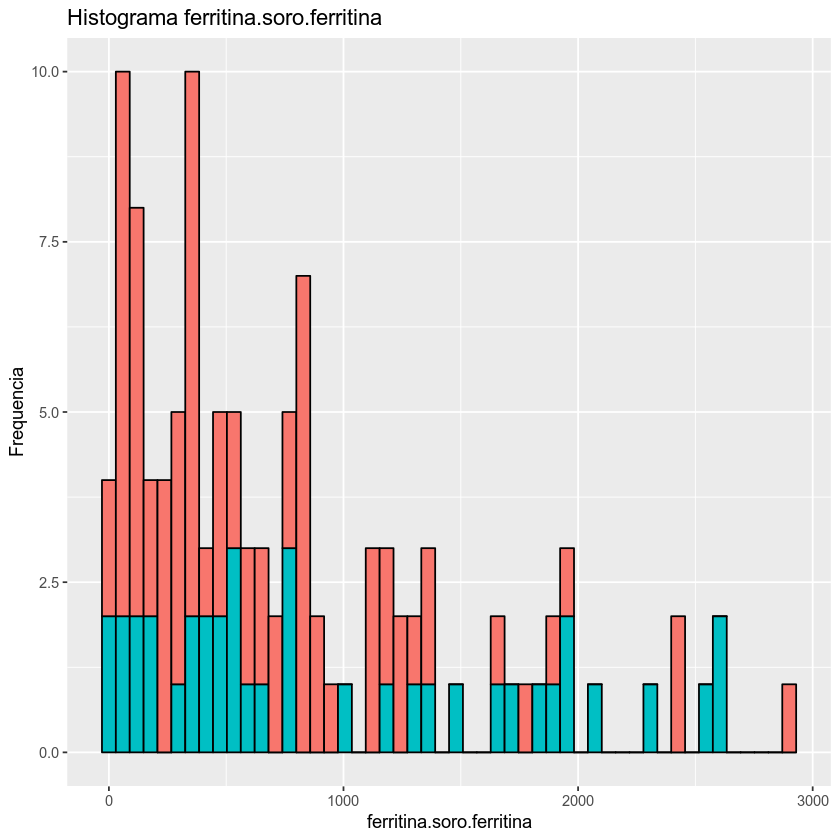

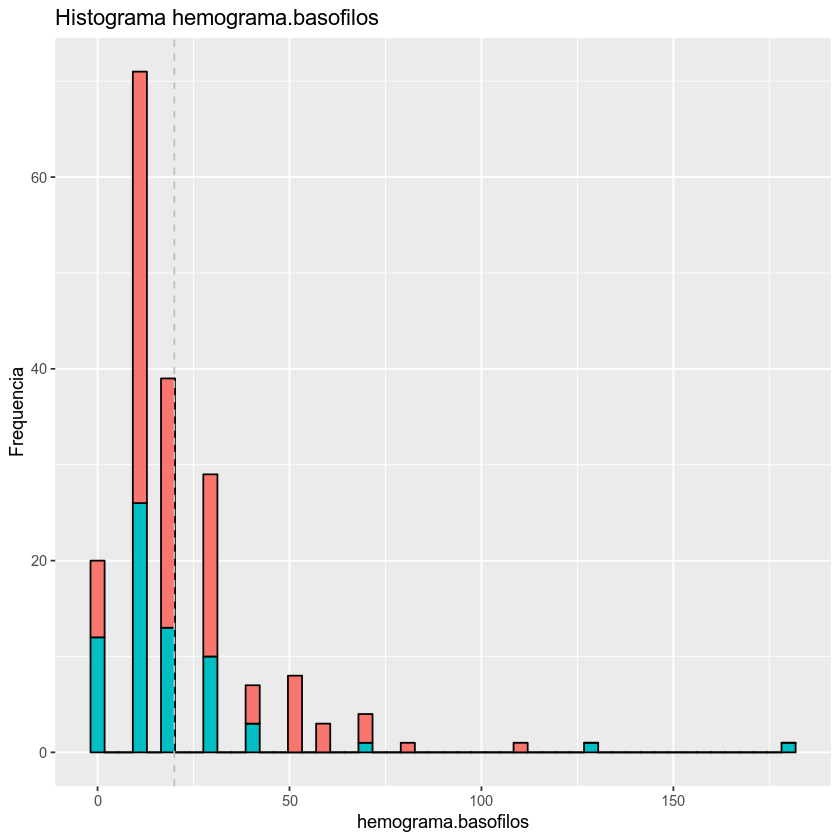

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


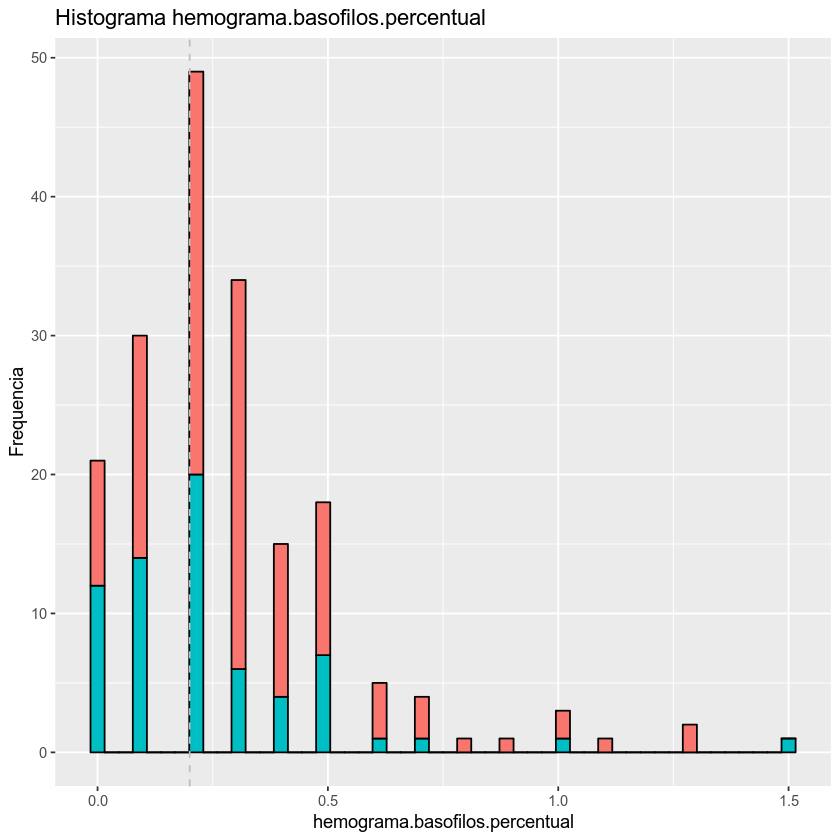

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


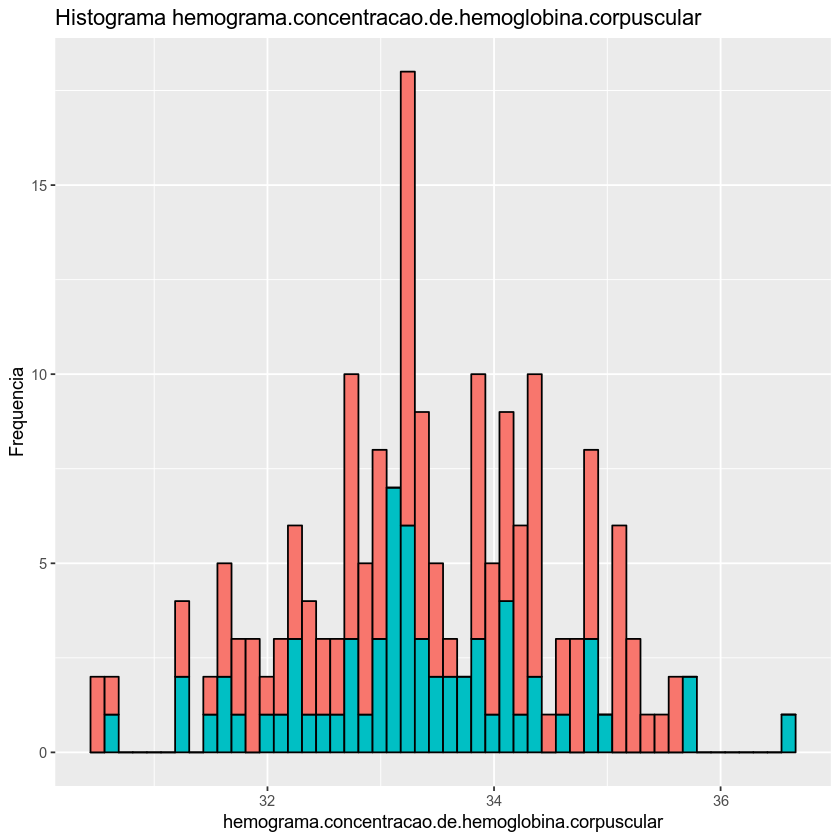

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


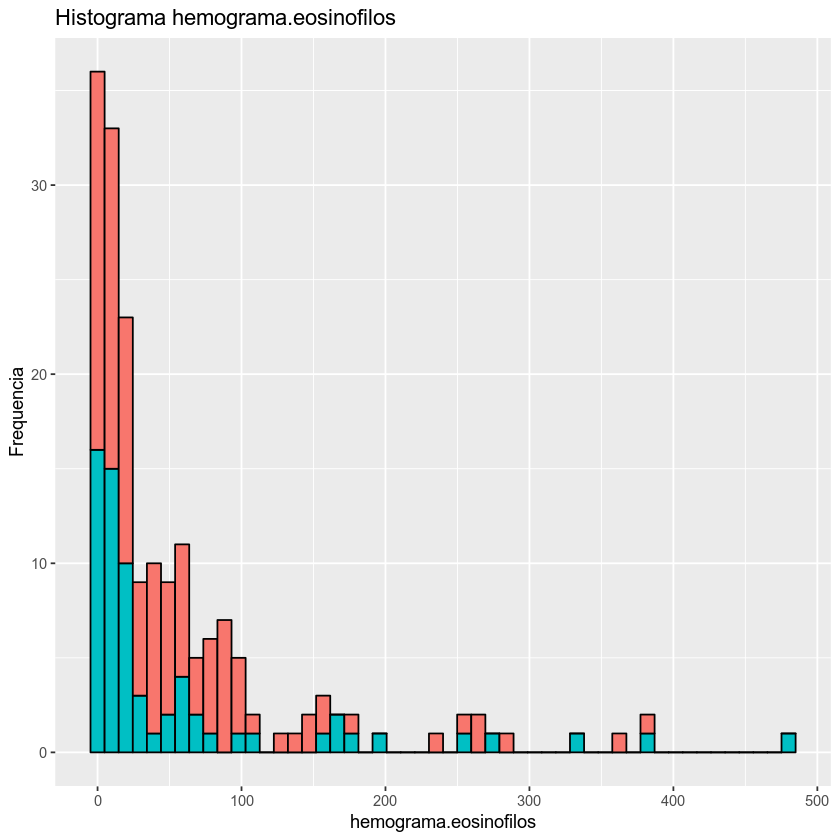

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


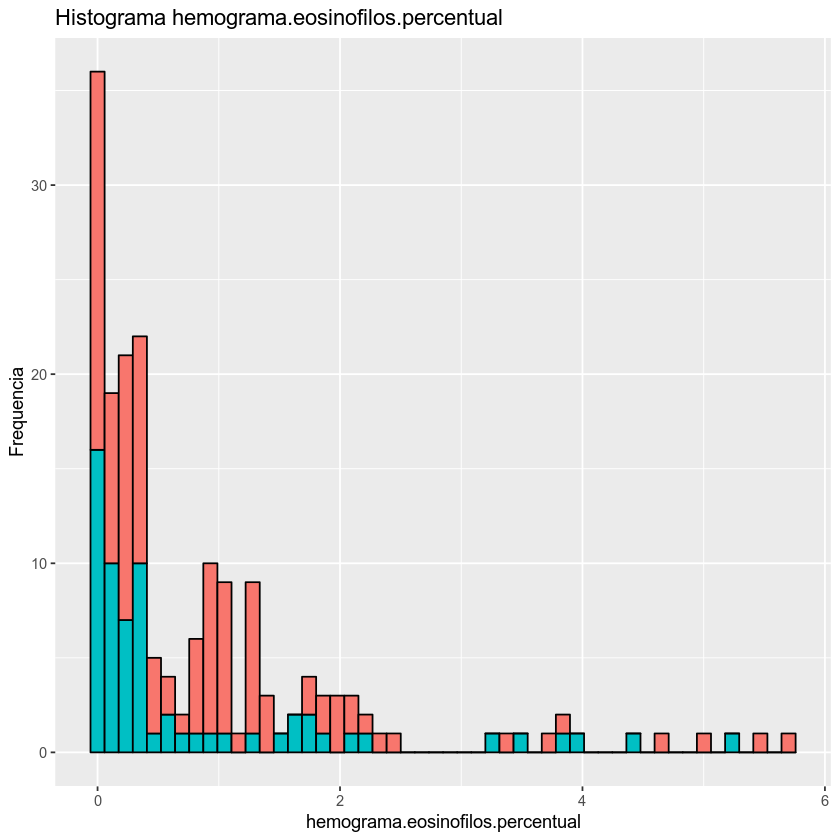

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


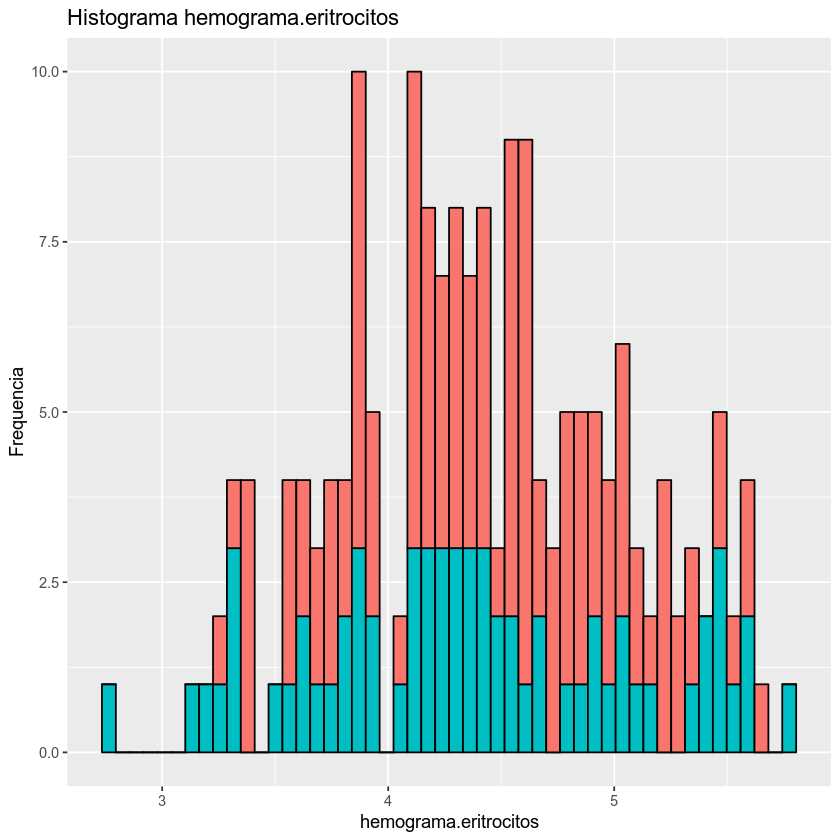

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


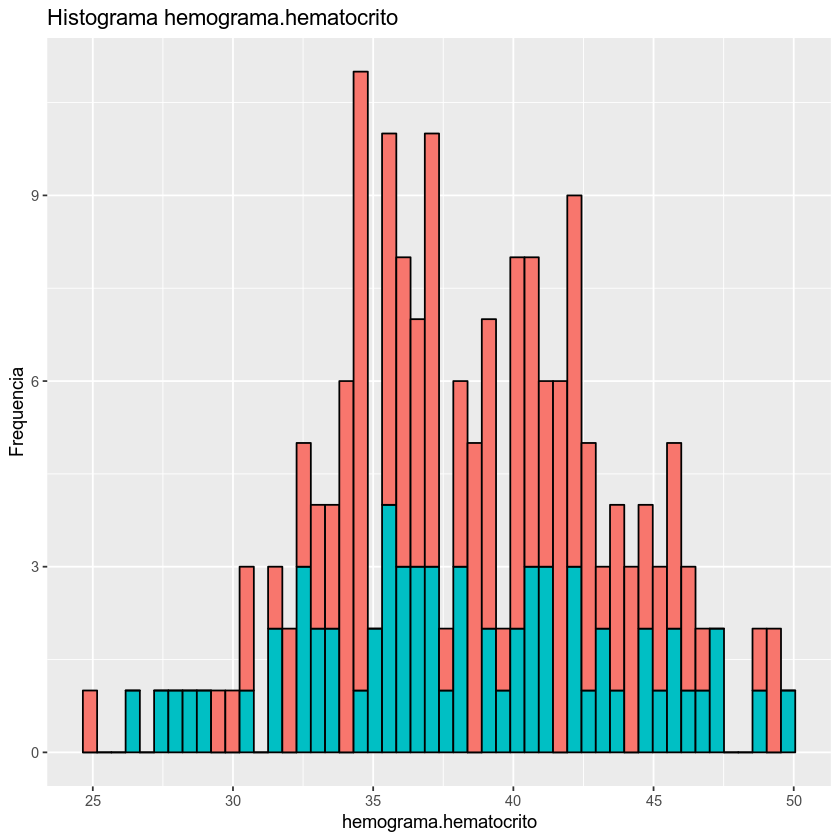

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


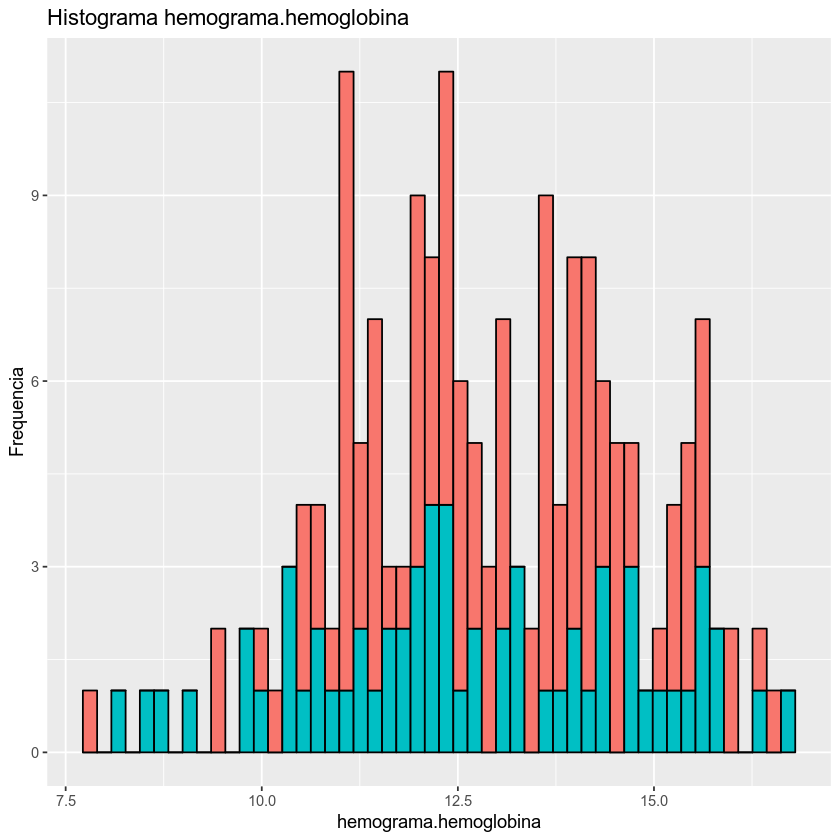

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


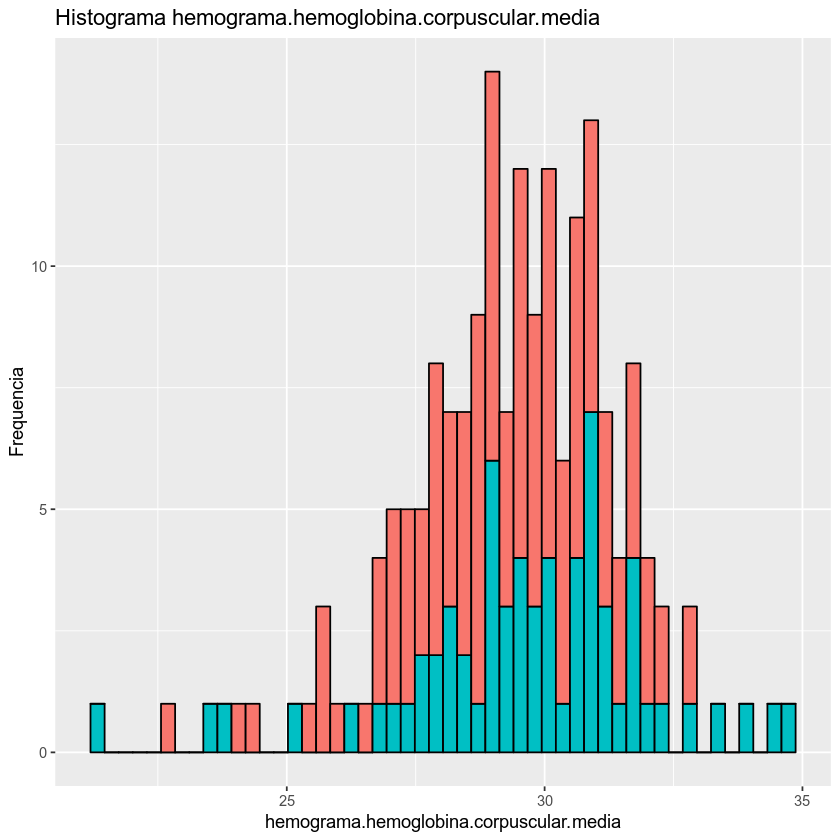

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


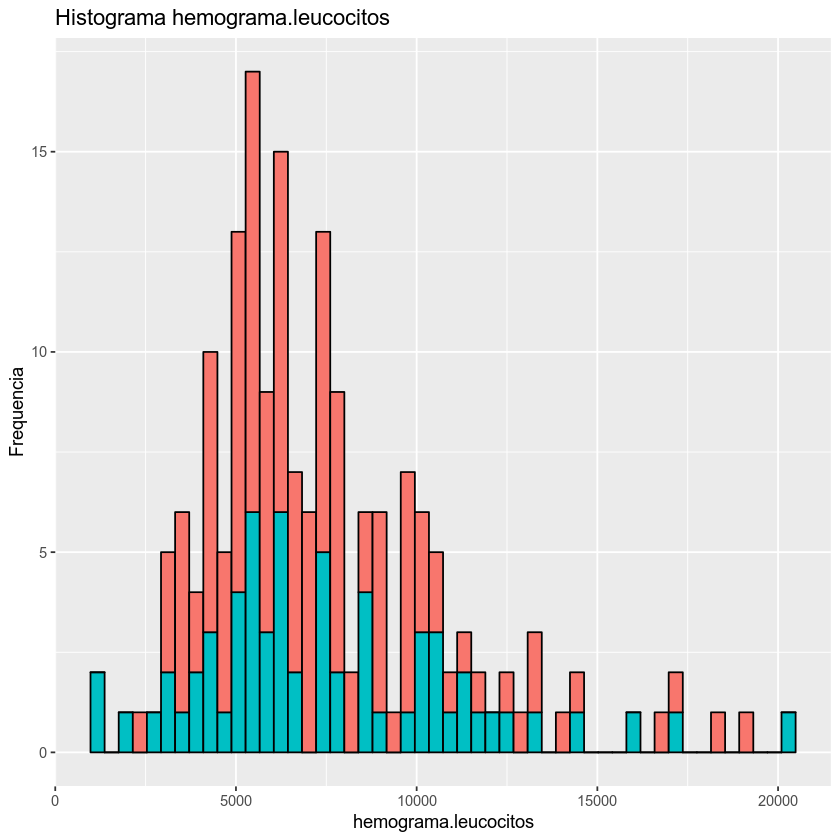

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


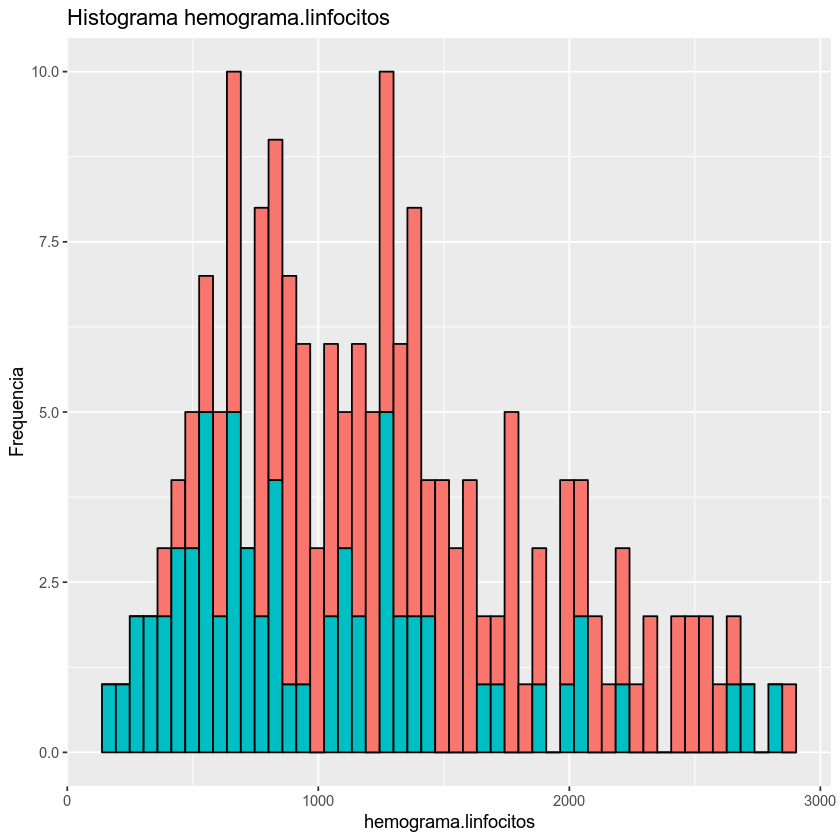

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


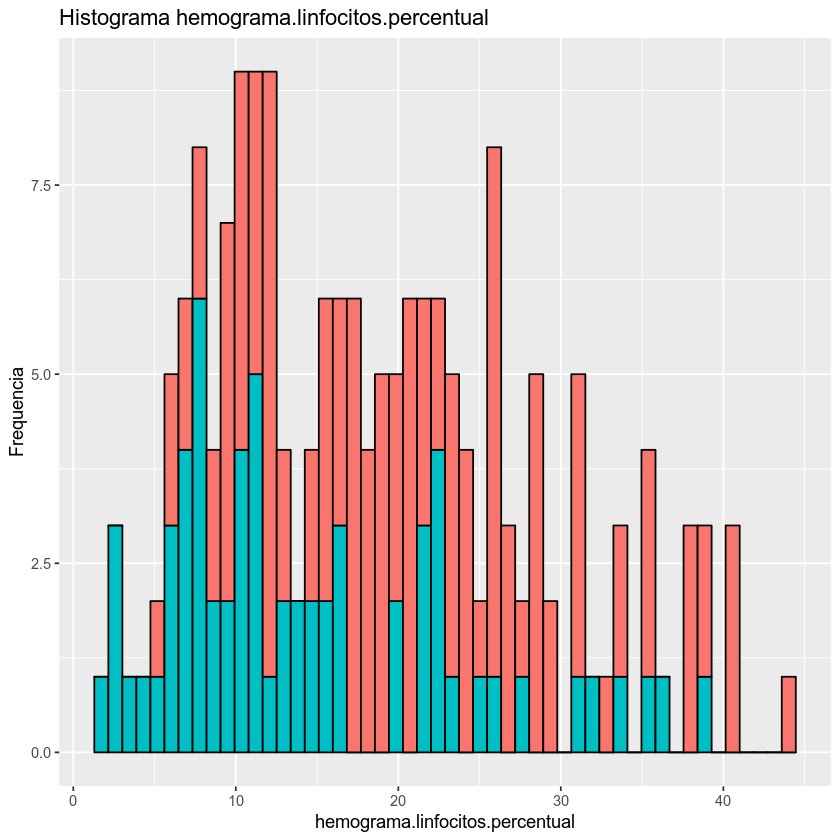

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


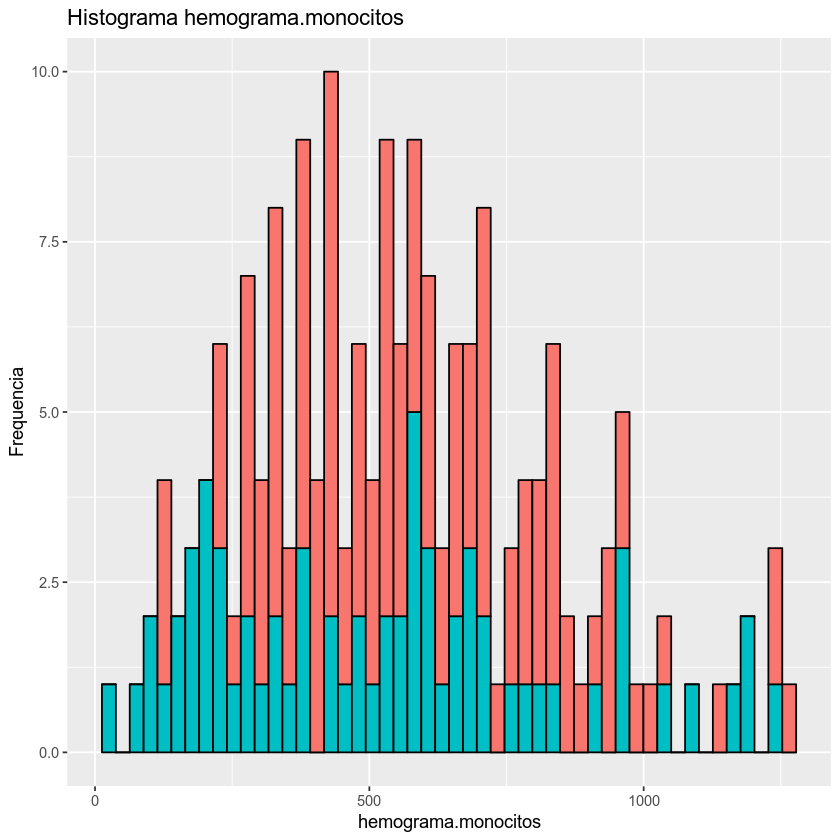

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


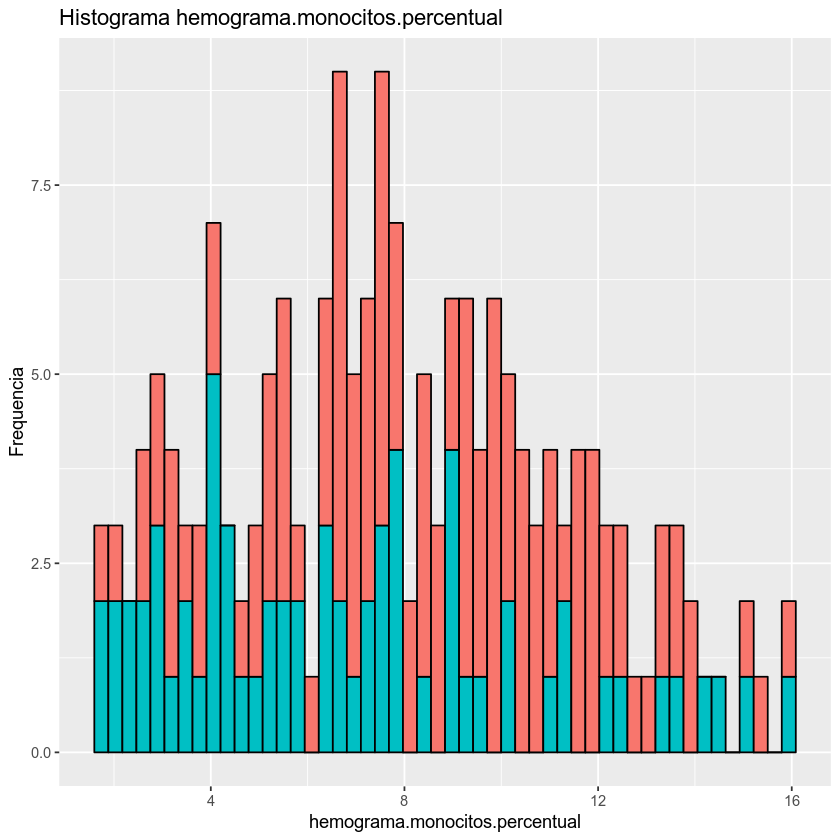

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


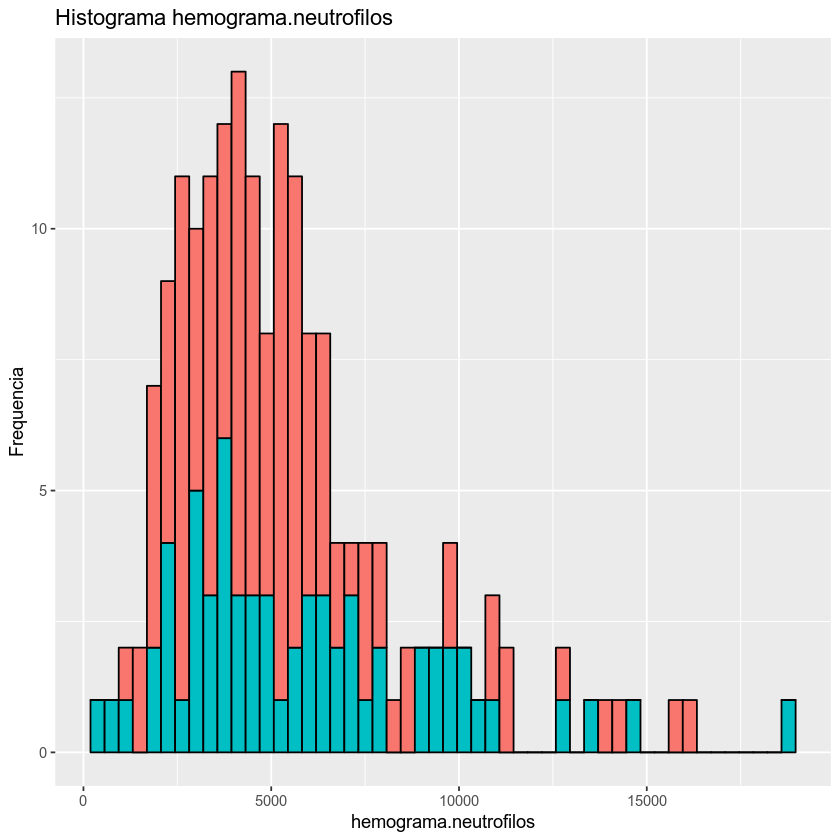

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


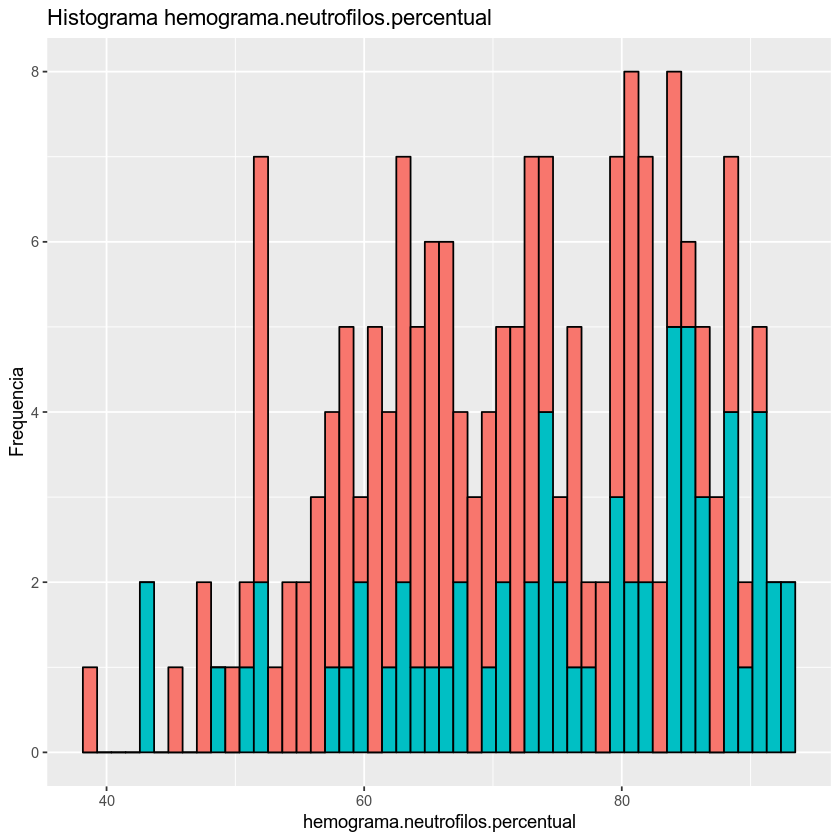

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


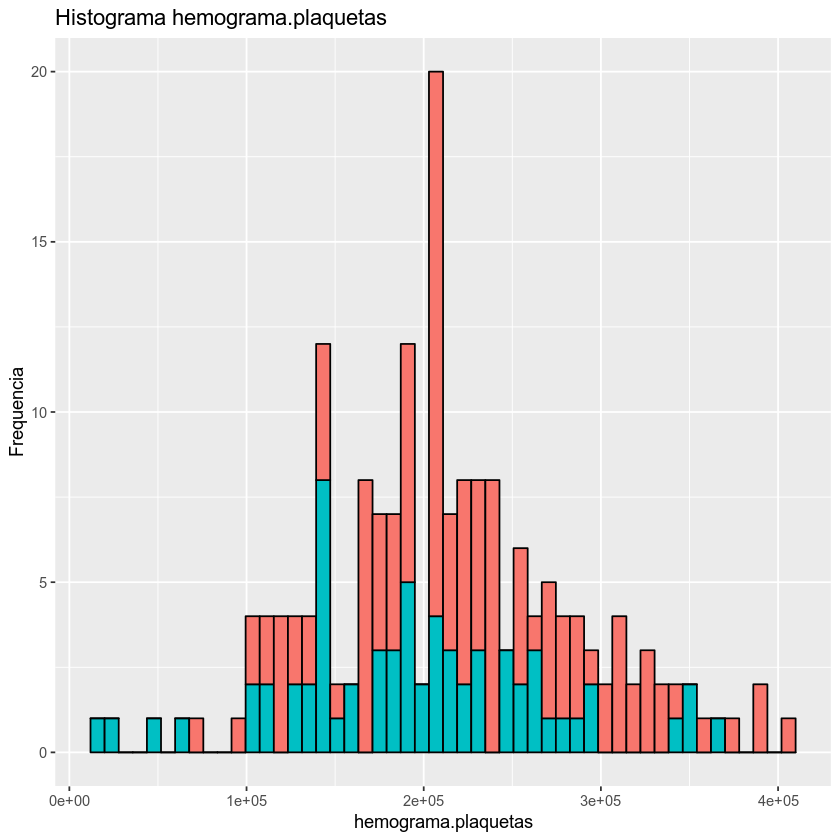

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


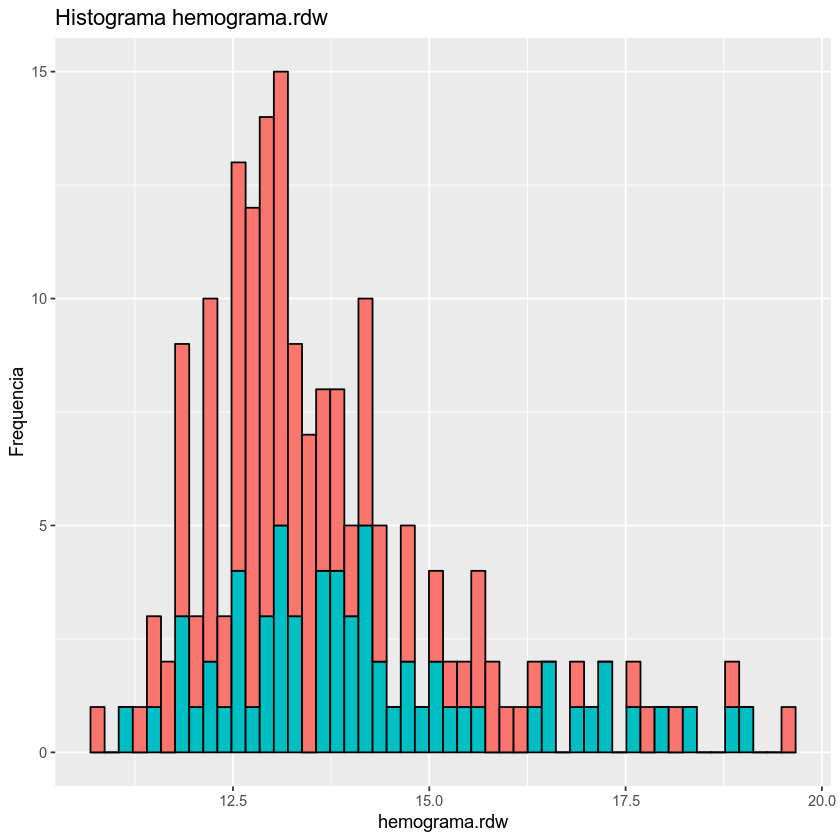

Warning message:
“Removed 8 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


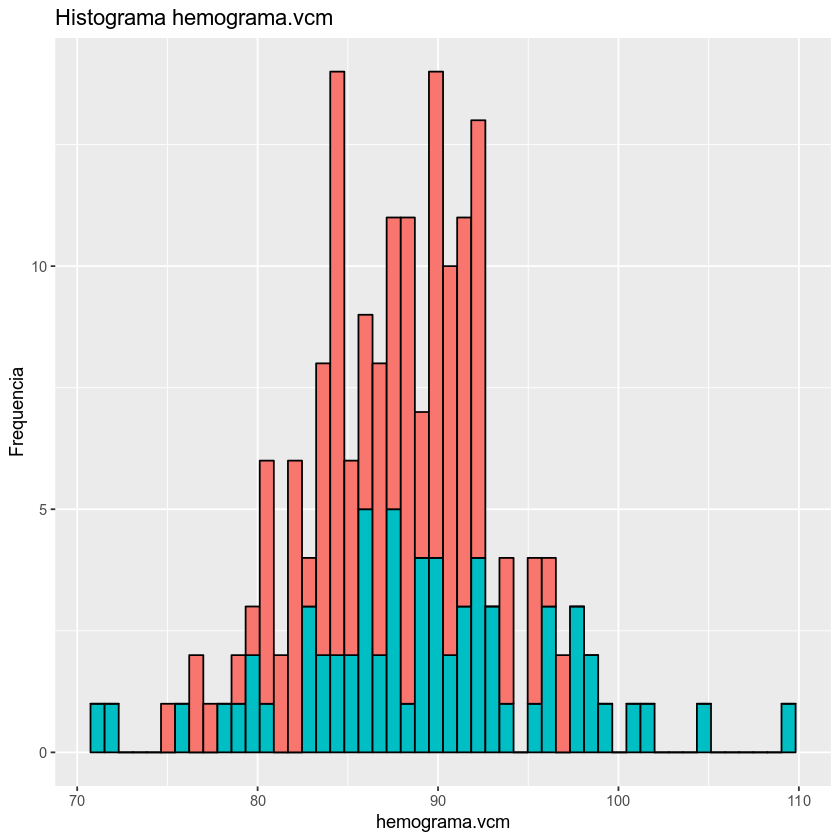

Warning message:
“Removed 46 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


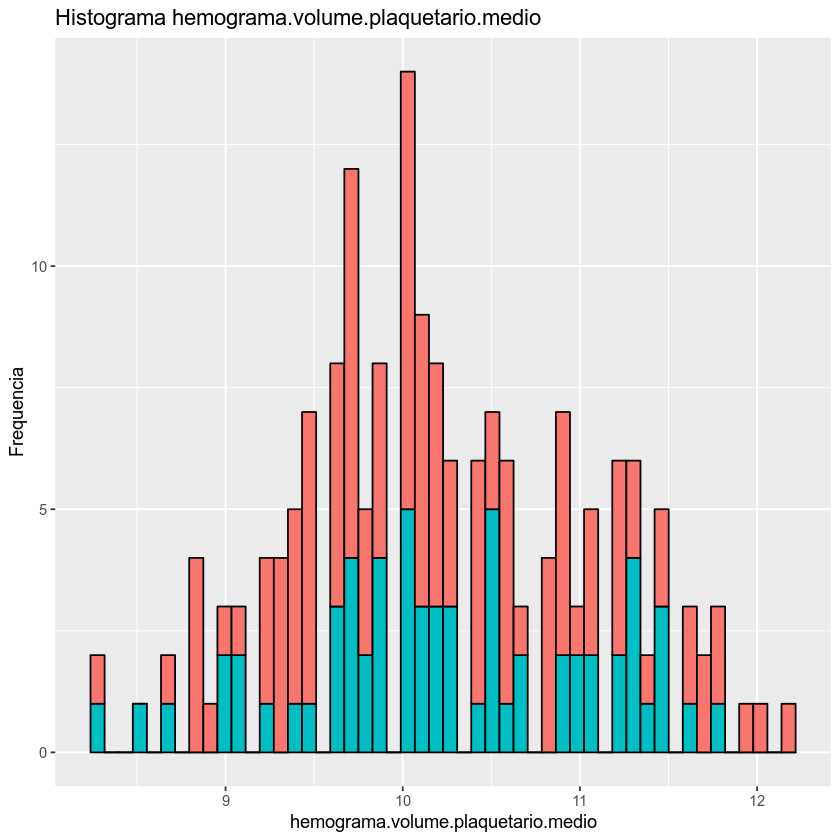

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


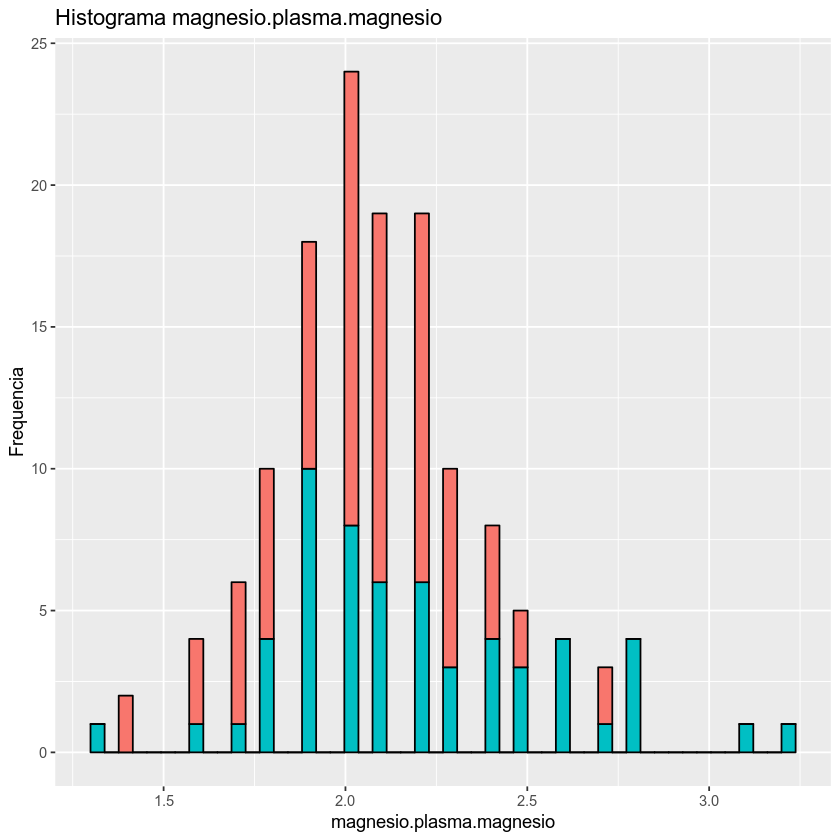

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


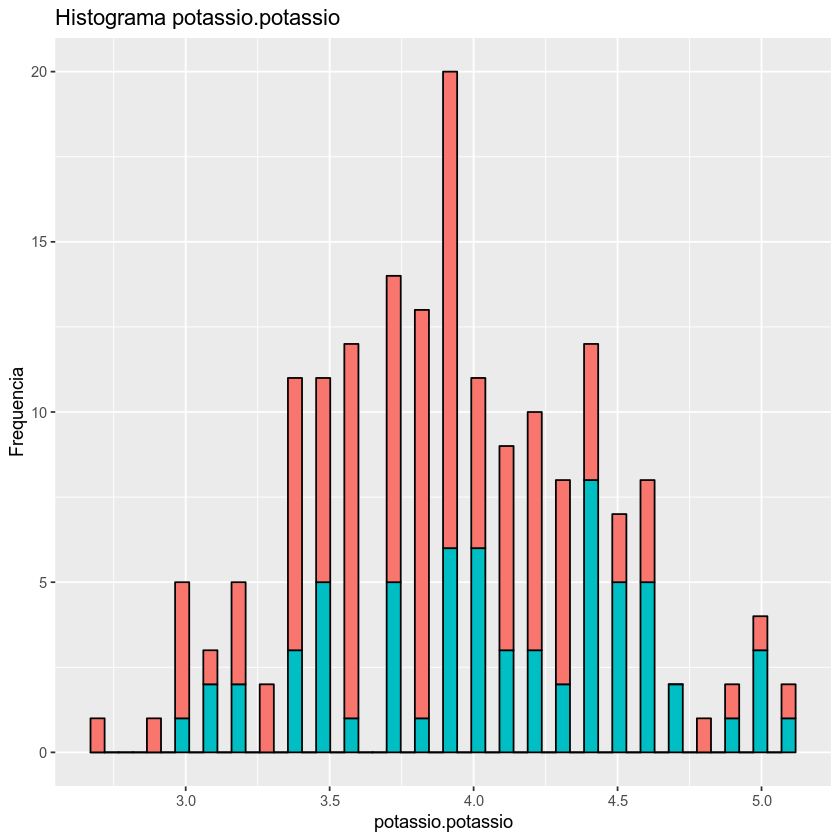

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


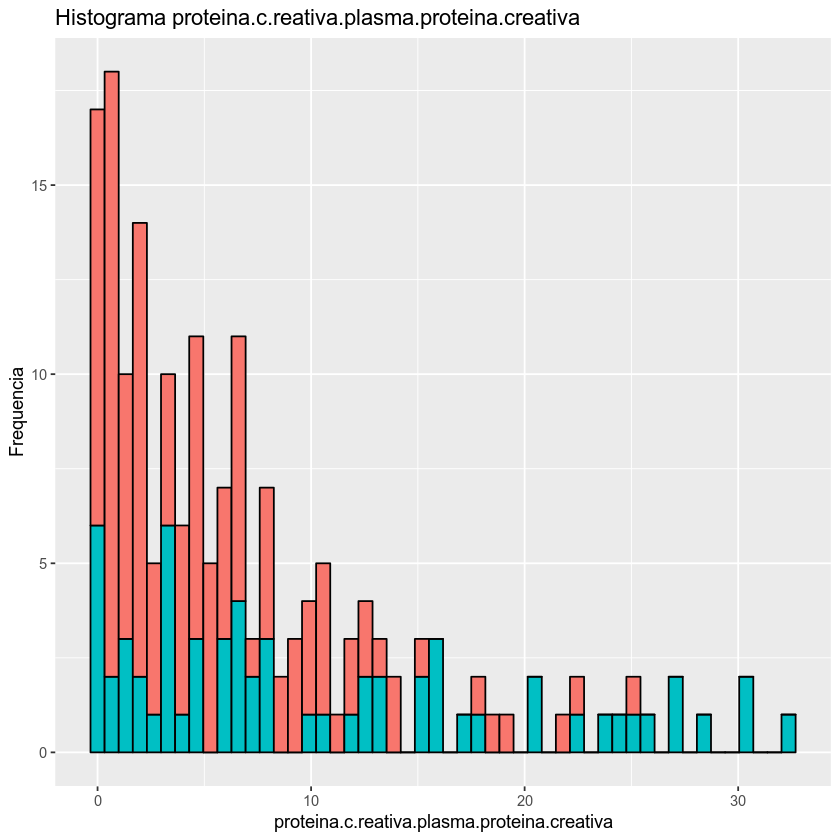

Warning message:
“Removed 47 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


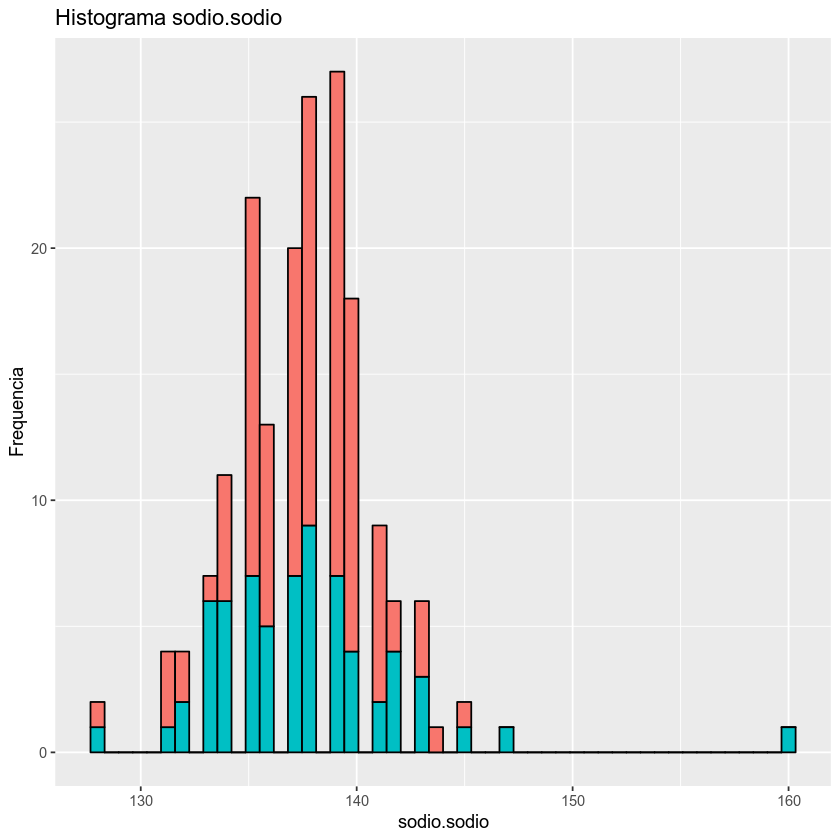

Warning message:
“Removed 43 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


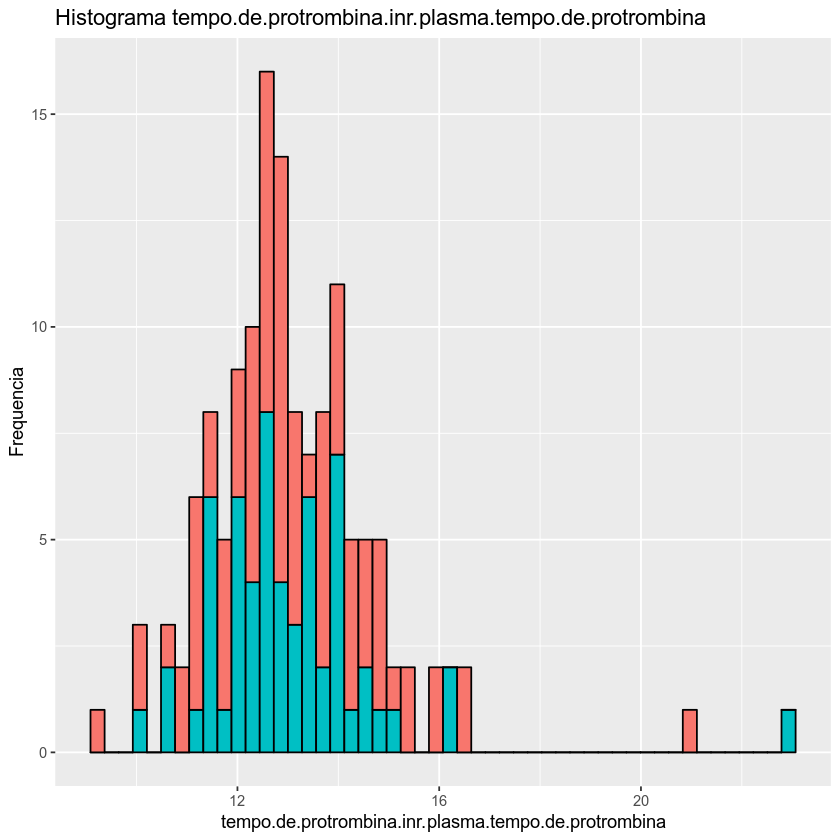

Warning message:
“Removed 48 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


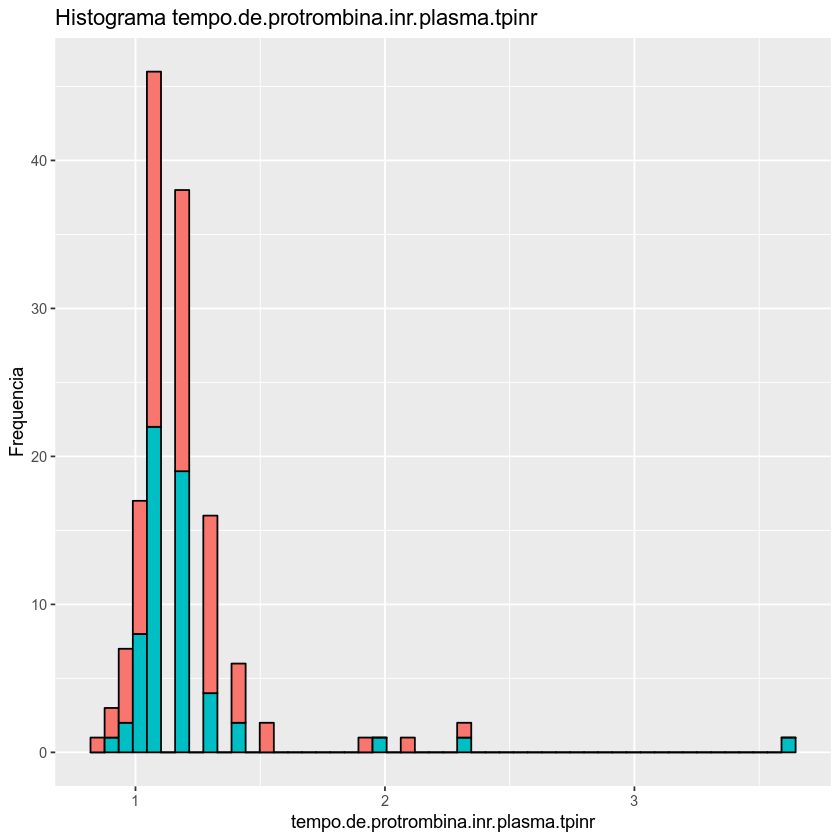

Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


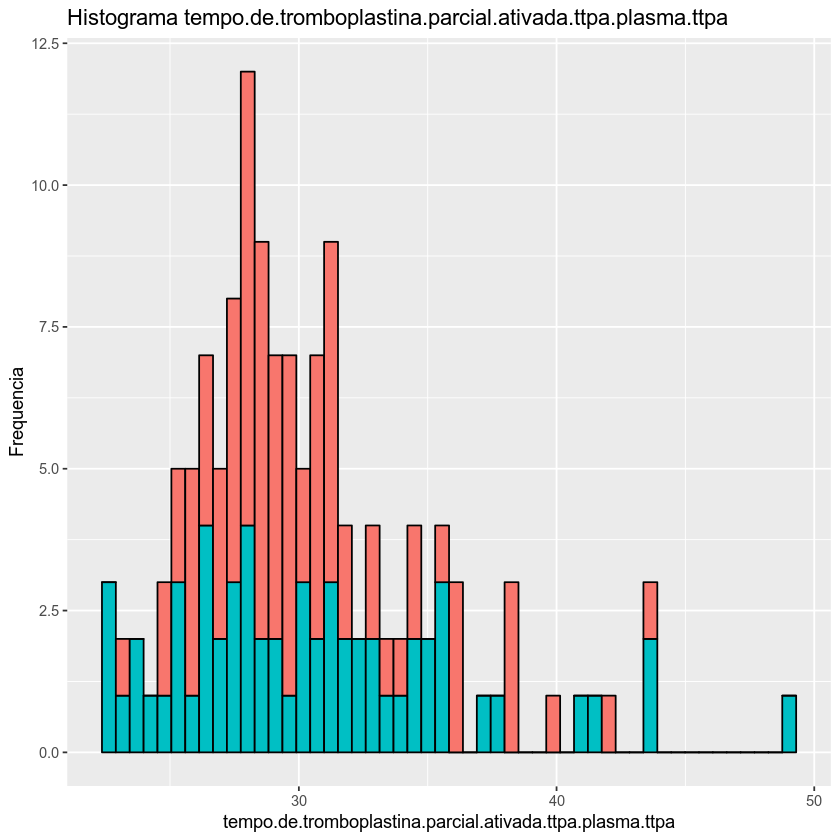

Warning message:
“Removed 48 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


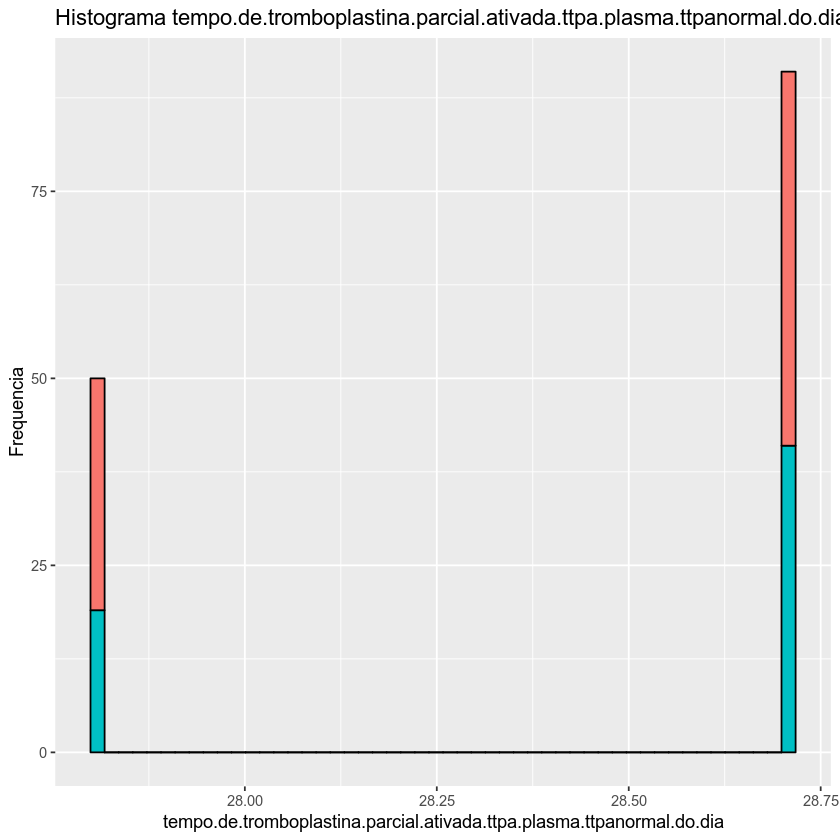

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


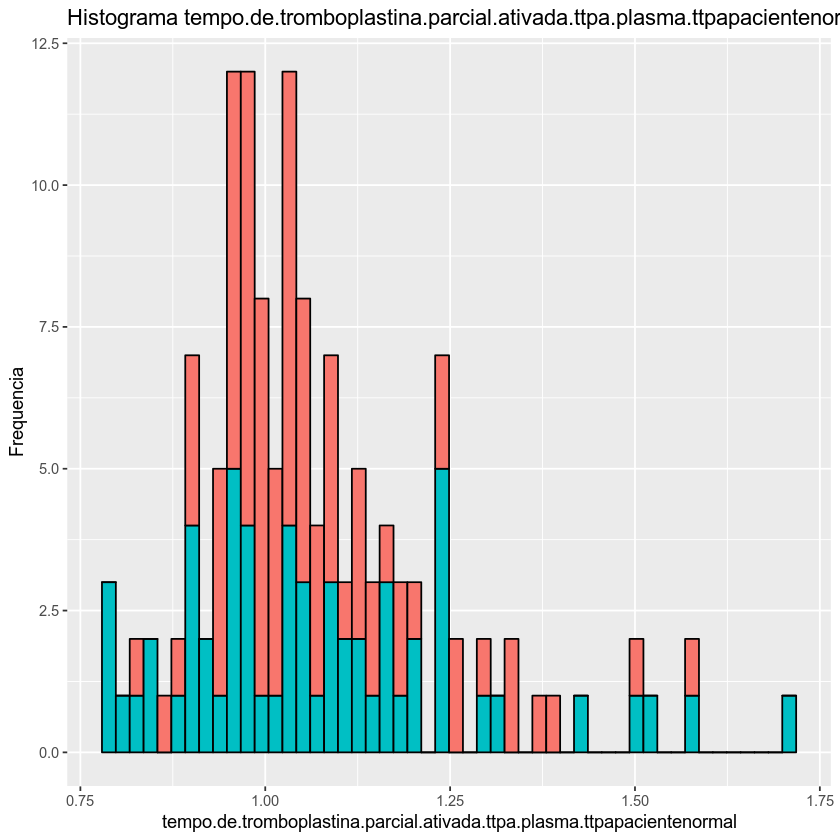

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


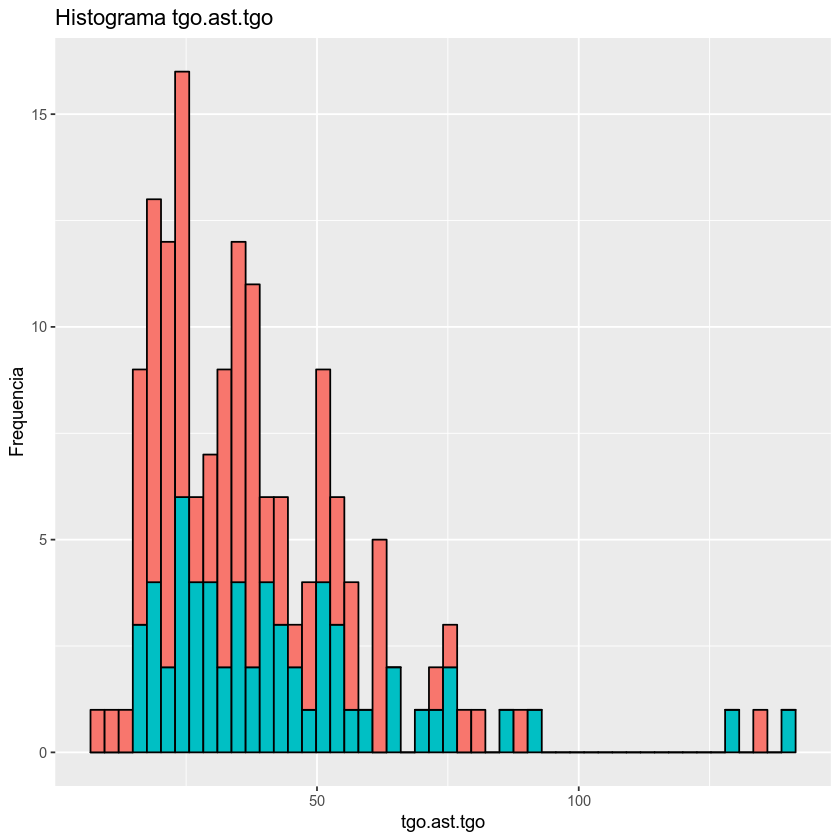

Warning message:
“Removed 10 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


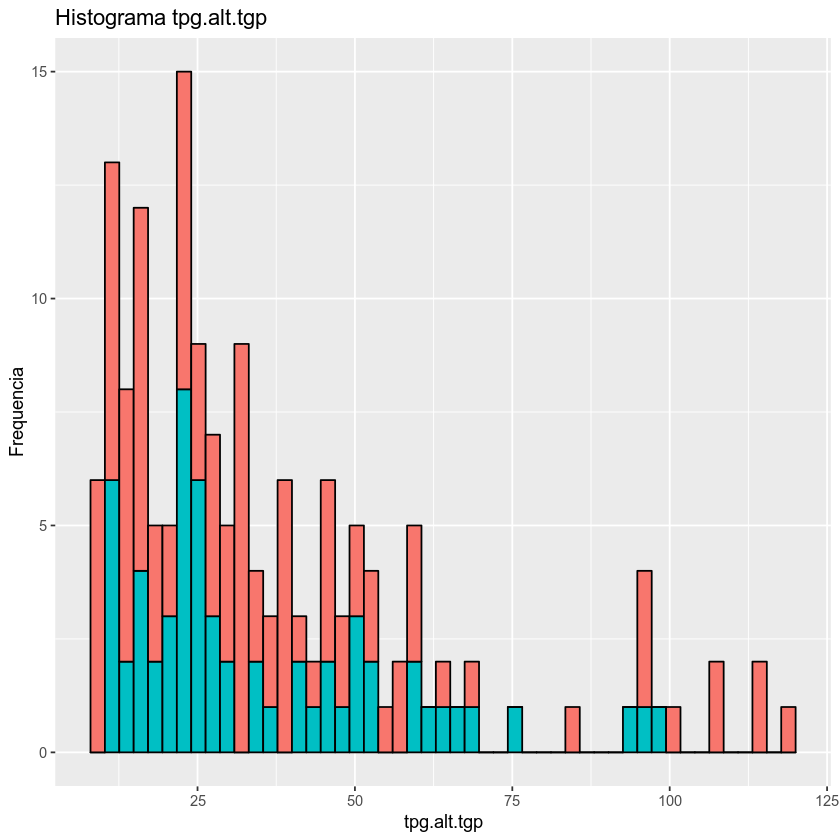

Warning message:
“Removed 77 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 185 rows containing missing values (geom_vline).”


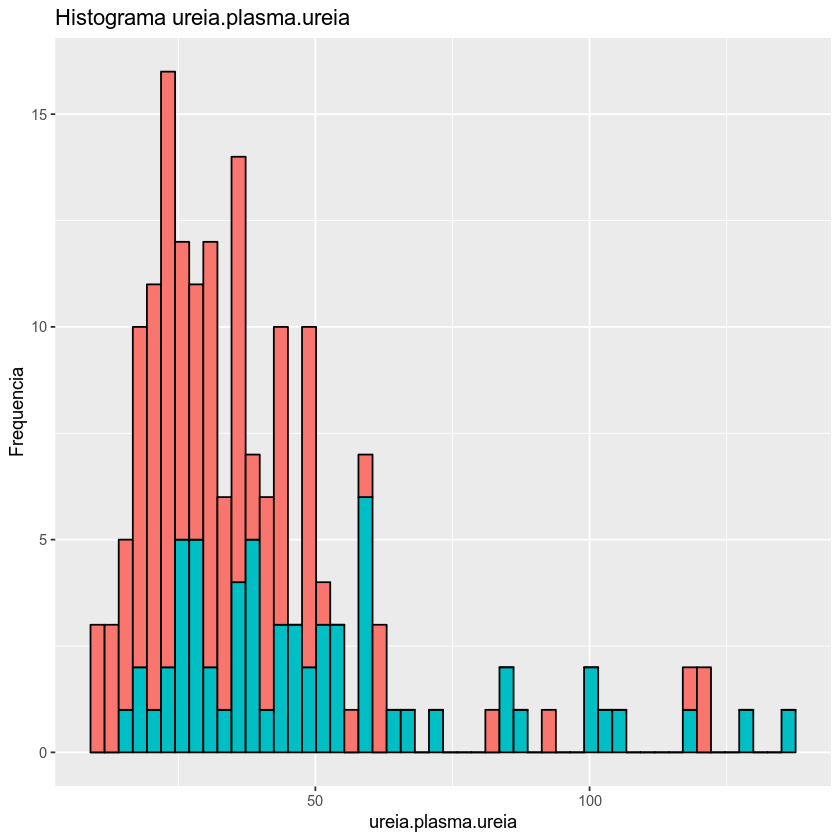

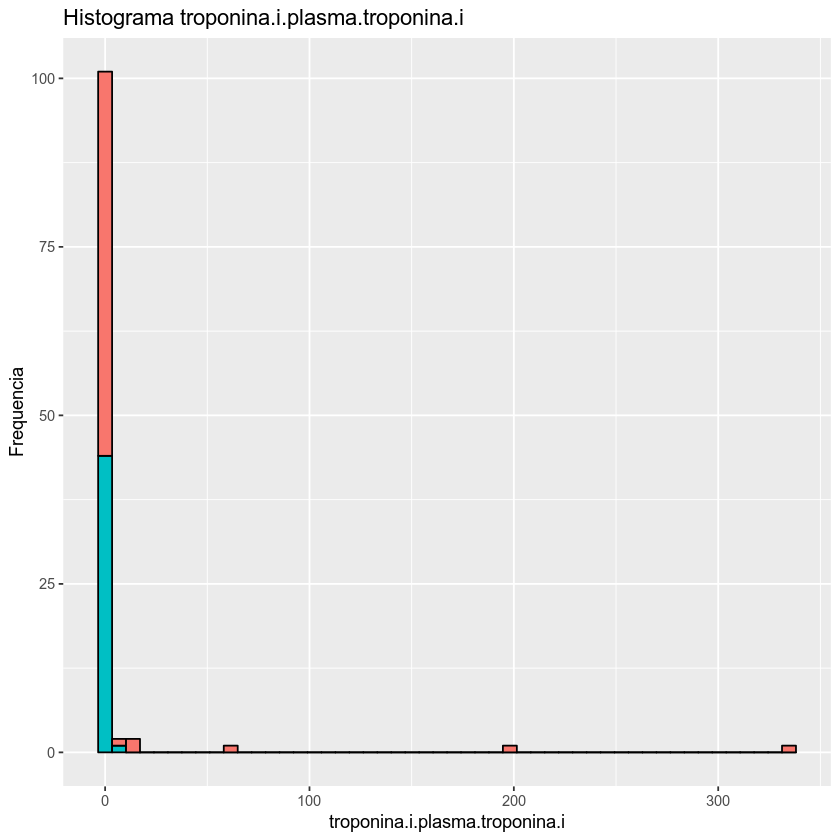

In [41]:
library(ggplot2)

for (i in (1:ncol(data))){

  label <- (data[i] %>% colnames)
  exame <- data %>% select(i) %>% as.list
  exame[[1]] -> exame
  His <- ggplot(data=data, 
  aes(x=exame))+
  geom_histogram(bins = 50, color="black", aes(fill=factor(severity))) +  
  xlab(label) +   ylab("Frequencia") +      
  theme(legend.position="none")+  ggtitle(paste("Histograma", label))+      
  geom_vline(data=data, aes(xintercept = median(exame)),linetype="dashed",color="grey")
  show(His)
}

In [42]:
#dimensions
data %>% dim

#check class numbers
data %>% count(severity)

#check column names
data %>% colnames

#move the target feature 
data %>% select(severity) -> severity
data %>% select(-severity) -> dado
cbind(dado,severity) -> data

#check column names
data %>% colnames

[1] 185  45

severity,n
<dbl>,<int>
0,118
1,67


[1] "sex"                                                                   
 [2] "age"                                                                   
 [3] "severity"                                                              
 [4] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.direta"        
 [5] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.indireta"      
 [6] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.total"         
 [7] "calcio.ionico.calcio.ionizado.sangue"                                  
 [8] "creatinina.plasma.creatinina"                                          
 [9] "creatino.fosfoquinase.cpk.plasma.ck"                                   
[10] "desidrogenase.latica.dhl.plasma.dhl"                                   
[11] "dimero.d.plasma.dimeros.d.quantitativo"                                
[12] "ferritina.soro.ferritina"                                              
[13] "hemograma.basofilos"                                                   
[14] "hemograma.basofilos.percentual"                                        
[15] "hemograma.concentracao.de.hemoglobina.corpuscular"                     
[16] "hemograma.eosinofilos"                                                 
[17] "hemograma.eosinofilos.percentual"                                      
[18] "hemograma.eritrocitos"                                                 
[19] "hemograma.hematocrito"                                                 
[20] "hemograma.hemoglobina"                                                 
[21] "hemograma.hemoglobina.corpuscular.media"                               
[22] "hemograma.leucocitos"                                                  
[23] "hemograma.linfocitos"                                                  
[24] "hemograma.linfocitos.percentual"                                       
[25] "hemograma.monocitos"                                                   
[26] "hemograma.monocitos.percentual"                                        
[27] "hemograma.neutrofilos"                                                 
[28] "hemograma.neutrofilos.percentual"                                      
[29] "hemograma.plaquetas"                                                   
[30] "hemograma.rdw"                                                         
[31] "hemograma.vcm"                                                         
[32] "hemograma.volume.plaquetario.medio"                                    
[33] "magnesio.plasma.magnesio"                                              
[34] "potassio.potassio"                                                     
[35] "proteina.c.reativa.plasma.proteina.creativa"                           
[36] "sodio.sodio"                                                           
[37] "tempo.de.protrombina.inr.plasma.tempo.de.protrombina"                  
[38] "tempo.de.protrombina.inr.plasma.tpinr"                                 
[39] "tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpa"              
[40] "tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpanormal.do.dia" 
[41] "tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpapacientenormal"
[42] "tgo.ast.tgo"                                                           
[43] "tpg.alt.tgp"                                                           
[44] "ureia.plasma.ureia"                                                    
[45] "troponina.i.plasma.troponina.i"

[1] "sex"                                                                   
 [2] "age"                                                                   
 [3] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.direta"        
 [4] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.indireta"      
 [5] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.total"         
 [6] "calcio.ionico.calcio.ionizado.sangue"                                  
 [7] "creatinina.plasma.creatinina"                                          
 [8] "creatino.fosfoquinase.cpk.plasma.ck"                                   
 [9] "desidrogenase.latica.dhl.plasma.dhl"                                   
[10] "dimero.d.plasma.dimeros.d.quantitativo"                                
[11] "ferritina.soro.ferritina"                                              
[12] "hemograma.basofilos"                                                   
[13] "hemograma.basofilos.percentual"                                        
[14] "hemograma.concentracao.de.hemoglobina.corpuscular"                     
[15] "hemograma.eosinofilos"                                                 
[16] "hemograma.eosinofilos.percentual"                                      
[17] "hemograma.eritrocitos"                                                 
[18] "hemograma.hematocrito"                                                 
[19] "hemograma.hemoglobina"                                                 
[20] "hemograma.hemoglobina.corpuscular.media"                               
[21] "hemograma.leucocitos"                                                  
[22] "hemograma.linfocitos"                                                  
[23] "hemograma.linfocitos.percentual"                                       
[24] "hemograma.monocitos"                                                   
[25] "hemograma.monocitos.percentual"                                        
[26] "hemograma.neutrofilos"                                                 
[27] "hemograma.neutrofilos.percentual"                                      
[28] "hemograma.plaquetas"                                                   
[29] "hemograma.rdw"                                                         
[30] "hemograma.vcm"                                                         
[31] "hemograma.volume.plaquetario.medio"                                    
[32] "magnesio.plasma.magnesio"                                              
[33] "potassio.potassio"                                                     
[34] "proteina.c.reativa.plasma.proteina.creativa"                           
[35] "sodio.sodio"                                                           
[36] "tempo.de.protrombina.inr.plasma.tempo.de.protrombina"                  
[37] "tempo.de.protrombina.inr.plasma.tpinr"                                 
[38] "tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpa"              
[39] "tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpanormal.do.dia" 
[40] "tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpapacientenormal"
[41] "tgo.ast.tgo"                                                           
[42] "tpg.alt.tgp"                                                           
[43] "ureia.plasma.ureia"                                                    
[44] "troponina.i.plasma.troponina.i"                                        
[45] "severity"

In [43]:
data %>% select(-c(hemograma.basofilos,
                   hemograma.basofilos.percentual, hemograma.concentracao.de.hemoglobina.corpuscular,
                   hemograma.hemoglobina.corpuscular.media,hemograma.rdw,
                   hemograma.vcm,hemograma.volume.plaquetario.medio,magnesio.plasma.magnesio,
                   tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpanormal.do.dia,
                   tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpapacientenormal, hemograma.eosinofilos,
                   hemograma.linfocitos,hemograma.monocitos,hemograma.neutrofilos)) -> data

In [44]:
data %>% dim

[1] 185  31

In [45]:
cor(na.omit(data)) -> corr

corr  <- as.data.frame(corr)

corr[corr < 0.9 | corr ==1] <- ""

corr %>% select_if(~any(. > 0.9 & .<1)) -> corr

corr 

Warning message in cor(na.omit(data)):
“the standard deviation is zero”


,hemograma.hematocrito,hemograma.hemoglobina,tempo.de.protrombina.inr.plasma.tempo.de.protrombina,tempo.de.protrombina.inr.plasma.tpinr
,<chr>,<chr>,<chr>,<chr>
sex,,,,
age,,,,
bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.direta,,,,
bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.indireta,,,,
bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.total,,,,
calcio.ionico.calcio.ionizado.sangue,,,,
creatinina.plasma.creatinina,,,,
creatino.fosfoquinase.cpk.plasma.ck,,,,
desidrogenase.latica.dhl.plasma.dhl,,,,


In [46]:
data %>% select(-c(tempo.de.protrombina.inr.plasma.tpinr, hemograma.hematocrito)) ->data

In [47]:
data %>% select(severity) -> severity
data %>% select(-severity) -> data
data %>% cbind(severity) -> data
data %>% colnames

[1] "sex"                                                             
 [2] "age"                                                             
 [3] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.direta"  
 [4] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.indireta"
 [5] "bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.total"   
 [6] "calcio.ionico.calcio.ionizado.sangue"                            
 [7] "creatinina.plasma.creatinina"                                    
 [8] "creatino.fosfoquinase.cpk.plasma.ck"                             
 [9] "desidrogenase.latica.dhl.plasma.dhl"                             
[10] "dimero.d.plasma.dimeros.d.quantitativo"                          
[11] "ferritina.soro.ferritina"                                        
[12] "hemograma.eosinofilos.percentual"                                
[13] "hemograma.eritrocitos"                                           
[14] "hemograma.hemoglobina"                                           
[15] "hemograma.leucocitos"                                            
[16] "hemograma.linfocitos.percentual"                                 
[17] "hemograma.monocitos.percentual"                                  
[18] "hemograma.neutrofilos.percentual"                                
[19] "hemograma.plaquetas"                                             
[20] "potassio.potassio"                                               
[21] "proteina.c.reativa.plasma.proteina.creativa"                     
[22] "sodio.sodio"                                                     
[23] "tempo.de.protrombina.inr.plasma.tempo.de.protrombina"            
[24] "tempo.de.tromboplastina.parcial.ativada.ttpa.plasma.ttpa"        
[25] "tgo.ast.tgo"                                                     
[26] "tpg.alt.tgp"                                                     
[27] "ureia.plasma.ureia"                                              
[28] "troponina.i.plasma.troponina.i"                                  
[29] "severity"

In [48]:
#write a csv
data %>% write_csv('hosp2_severity.csv')

#rename features
names(data) <- c( 'Sex','Creatinine','Basophils',
                 'Basophils(%)','CHC', 'Eosinophils',
                 'Eosinophils(%)',
                 'Erythrocytes','Hematocrits','Hemoglobin',
                 'MCH','Leukocytes','Lymphocytes',
                 'Lymphocytes(%)','Monocytes','Monocytes(%)',
                 'Neutrophils','Neutrophils(%)','Platelet count',
                 'RDW','MCV','MPV',
                 'Potassium','C-reative protein','Sodium',
                 'Urea','D-dimers','Severity')

In [49]:
#check NAs percentage in each column
colMeans(is.na(data)) %>% as.data.frame

,.
,<dbl>
sex,0.00000000
age,0.03783784
bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.direta,0.40000000
bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.indireta,0.40000000
bilirrubinas.total.direta.e.indireta.plasma.bilirrubina.total,0.40000000
calcio.ionico.calcio.ionizado.sangue,0.29189189
creatinina.plasma.creatinina,0.04864865
creatino.fosfoquinase.cpk.plasma.ck,0.31351351
desidrogenase.latica.dhl.plasma.dhl,0.30810811


In [8]:
data <- read.csv('hosp2_severity.csv', stringsAsFactors = FALSE)
data %>% select(c('sex',
'age',
'creatinina.plasma.creatinina',
'creatino.fosfoquinase.cpk.plasma.ck',
'dimero.d.plasma.dimeros.d.quantitativo',
'hemograma.eosinofilos.percentual',
'hemograma.hemoglobina',
'hemograma.leucocitos',
'hemograma.linfocitos.percentual',
'hemograma.monocitos.percentual',
'hemograma.neutrofilos.percentual',
'hemograma.plaquetas',
'potassio.potassio',
'proteina.c.reativa.plasma.proteina.creativa',
'sodio.sodio',
'tgo.ast.tgo',
'tpg.alt.tgp',
'ureia.plasma.ureia',
'troponina.i.plasma.troponina.i',
'severity'))-> data

data %>% dim

data %>% write_csv('hosp2_severity_.csv')

[1] 185  20

In [3]:
data <- read.csv('hosp2_severity_.csv')
data %>% count(severity)
data %>% count(sex)
data %>% select(age) %>% summary


severity,n
<int>,<int>
0,118
1,67


sex,n
<int>,<int>
0,102
1,83


      age      
 Min.   :24.0  
 1st Qu.:47.0  
 Median :61.5  
 Mean   :59.4  
 3rd Qu.:72.0  
 Max.   :86.0  
 NA's   :7     